### Imports

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 300

In [3]:
from sklearn.preprocessing import Normalizer

In [4]:
from chart_studio import plotly
import plotly.figure_factory as ff

In [5]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [6]:
DATA_VERSION = 'v5'

In [7]:
gov_arch_csv = '../data/' + DATA_VERSION + '/communities_data_prepped.csv'

In [8]:
fig_dir = '../' + DATA_VERSION + '-fig/fig-communities/SCCS/'

In [9]:
gov_df = pd.read_csv(gov_arch_csv)

In [10]:
# SCCS only
gov_df = gov_df.loc[gov_df['is_SCCS'] == 1]

In [11]:
gov_df

Name                                       Institutions  \
7              Babylonia  Governor,Council of Elders,The citizens/The As...   
27           Igbo People  Omu,Obi,Ikporo Ani,Onotu,Ilogo,Awo,Otu umuada,...   
36  Kung San (Ju/hoansi)                         Hxaro,Headman,Group,Kgotla   
46            Nambikuara                                     Uilikande,Band   
47        Natchez people        Great Sun,War Council,Governor of districts   
55                  Pomo  Council,Head Captain,Hereditary Captains ,Male...   
56       Rome (republic)  Tribunes of the plebs,Concilium Plebis,Roman s...   
64        Wendat (Huron)  Longhouse women's council,Confederacy council,...   
65             Tehuelche                 Gownok (Yank),Collection of chiefs   
66             Tupinamba                  Council of the Chiefs,Chiefs,Paje   
67              Yanomamo                   Big Man,Gathering of adult males   
68                  Ajie                             Ukai,Council of Elders   
69                 Maori             Akiri,Rangatira,Runanga,Kaumaatua,Kuia   
70            Marquesans          Haka'iki,Chief's council,Tau'a,Toa,Tuhuka   
71              Samoans                          King,Tumea,Pule,Matai,Fono   
72            Gilbertese  Chief,Maneaba Council,Unimane,Island assembly,...   
73                  Toda  Noim,Clan Council,Village Council,Monegar,Etud...   
74            Nicobarese  Kinem ma,Kavee kunyee,Village Council,Taka-ran...   
75        Gilyak (Nivkh)  Yz,Urdlanivukhi,Khal geimar (kheymar),Khimu ni...   
76                  Nama  Gao-aob,Raad,Mass meeting,Onderkaptein,Gowaba-...   
77       Thonga (Tsonga)  Numzane,Hubo,Chief,Royal Court,Letikulu,Tindju...   
78               Ashanti  Asante Hene,Chief,Queen Mother,Mpanyimfo,Kotok...   
79                 Masai                                Enkigwana,Spokesman   
80                Somali                   Islaan,Shir,Boqor,Tribal Council   
81  Ingalik [Deg Xit'an]  Village council ,Leader of the council,Shaman,...   
82               Kutenai      Chief,Assistant Chief,Indian Council,Wise men   
83      Micmac [Mi'kmaq]  Sagamore,Buoin,Group,Council of Elders,State C...   
84               Hidatsa  War chief,Peace Chief,Council of Elders,Tribal...   
85                Pawnee  Hereditary Chief,Elected chief,Subchief,Joint ...   
86            Chiricahua         Nanta (na•ta),head of households,Gathering   
87                 Omaha  Nikagahi xude,Nikagahi shabe,Council of Seven,...   
88                 Twana  Longhouse leader,Council of elders,Village chi...   
89              Comanche  Civil chief,Aides/Counsellors,Peace Chief,Hera...   
90               Huichol  Kawiteru,Council of elders,Gobernador,Jicarero...   

                                            Mechanism  \
7   Assembly (central),Checks and balances,Consent...   
27  Dual-sex political system,Matriarchy,Assembly ...   
36  Leader (first among equals),Deliberation,Corpo...   
46  Leader (first among equals),Meritocracy,Reputa...   
47  Autocratic Leader (unbound),Self-help,Capital ...   
55  Election,Blood relations,Heredity,Council (cen...   
56  Temporary position of power/Term Limits,Electi...   
64  Council (central) ,Matriarchy,Frequent and/or ...   
65  Autocratic Leader/Chief (bound),Meritocracy,Po...   
66  Council (central) ,Gerontocracy,Public meeting...   
67  Autocratic Leader/Chief (bound),Meritocracy,Te...   
68  Autocratic Leader/Chief (bound),Induction rite...   
69  Autocratic Leader/Chief (bound),Heredity,Assem...   
70  Autocratic Leader/Chief (bound),Heredity,Merit...   
71  King(chief)-as-Figurehead,Autocratic Leader/Ch...   
72  Autocratic Leader/Chief (bound),Gerontocracy,C...   
73  Council (central) ,Council (local),Gerontocrac...   
74  Autocratic Leader/Chief (bound),Gerontocracy,H...   
75  Gathering,Deliberation,Magistrate/official,Mer...   
76  King(chief)-as-Figurehead,Heredity,Consultatio...   
77  Autocratic Leader/Chief (bound),Council (local...   


In [12]:
gov_df.dtypes

Name                                                                               object
Institutions                                                                       object
Mechanism                                                                          object
Notes                                                                              object
Time span                                                                          object
Geography                                                                          object
Size                                                                               object
Source                                                                             object
Metanotes                                                                          object
Heterogeneity                                                                      object
FC comments                                                                        object
expert che

## Descriptive analysis

## Histograms

In [13]:
list(gov_df.columns)

['Name',
 'Institutions',
 'Mechanism',
 'Notes',
 'Time span',
 'Geography',
 'Size',
 'Source',
 'Metanotes',
 'Heterogeneity ',
 'FC comments',
 'expert check',
 'Time span: Start',
 'Time span: End',
 'SCCS',
 'is_SCCS',
 'decision_making_mechanisms_include_representation',
 'enforcement_mechanisms_include_paying_damages_compensation',
 'decision_making_mechanisms_include_temporary_position_of_power_term_limits',
 'enforcement_mechanisms_include_forced_labour',
 'decision_making_mechanisms_include_remunerated_position',
 'access_mechanisms_include_property_requirement',
 'access_mechanisms_include_induction_rite_ceremony',
 'access_mechanisms_include_gerontocracy',
 'decision_making_mechanisms_include_majority_voting',
 'enforcement_mechanisms_include_graduated_sanctions',
 'decision_making_mechanisms_include_plurality_voting',
 'enforcement_mechanisms_include_monitoring',
 'decision_making_mechanisms_include_assembly_local',
 'decision_making_mechanisms_include_petition',
 'access

In [14]:
mechanisms_list = [x for x in gov_df.columns if 'mechanisms' in x]
mechanisms_list

['decision_making_mechanisms_include_representation',
 'enforcement_mechanisms_include_paying_damages_compensation',
 'decision_making_mechanisms_include_temporary_position_of_power_term_limits',
 'enforcement_mechanisms_include_forced_labour',
 'decision_making_mechanisms_include_remunerated_position',
 'access_mechanisms_include_property_requirement',
 'access_mechanisms_include_induction_rite_ceremony',
 'access_mechanisms_include_gerontocracy',
 'decision_making_mechanisms_include_majority_voting',
 'enforcement_mechanisms_include_graduated_sanctions',
 'decision_making_mechanisms_include_plurality_voting',
 'enforcement_mechanisms_include_monitoring',
 'decision_making_mechanisms_include_assembly_local',
 'decision_making_mechanisms_include_petition',
 'access_mechanisms_include_enfranchisement',
 'access_mechanisms_include_age_boundaries',
 'enforcement_mechanisms_include_exit',
 'decision_making_mechanisms_include_secret_ballot',
 'decision_making_mechanisms_include_coalition',


In [15]:
# mechanisms_df = gov_df[['Name'] + mechanisms_list]
mechanisms_df = gov_df[mechanisms_list]

In [16]:
mechanisms_df

decision_making_mechanisms_include_representation  \
7                                                   0   
27                                                  1   
36                                                  0   
46                                                  0   
47                                                  0   
55                                                  1   
56                                                  0   
64                                                  0   
65                                                  0   
66                                                  0   
67                                                  0   
68                                                  0   
69                                                  0   
70                                                  0   
71                                                  0   
72                                                  1   
73                                                  1   
74                                                  1   
75                                                  0   
76                                                  0   
77                                                  1   
78                                                  1   
79                                                  0   
80                                                  1   
81                                                  0   
82                                                  0   
83                                                  1   
84                                                  1   
85                                                  0   
86                                                  0   
87                                                  0   
88                                                  1   
89                                                  0   
90                                                  0   

    enforcement_mechanisms_include_paying_damages_compensation  \
7                                                   0            
27                                                  0            
36                                                  0            
46                                                  0            
47                                                  0            
55                                                  0            
56                                                  0            
64                                                  0            
65                                                  0            
66                                                  0            
67                                                  0            
68                                                  0            
69                                                  0            
70                                                  0            
71                                                  0            
72                                                  0            
73                                                  0            
74                                                  0            
75                                                  0            
76                                                  0            
77                                                  0            
78                                                  0            
79                                                  0            
80                                                  0            
81                                                  0            
82                                                  0            
83                                                  0            
84                                                  0            
85                                                  0            
86                          

In [17]:
mechanisms_df.sum().sort_values(ascending=False)

decision_making_mechanisms_include_magistrate_official                             28
access_mechanisms_include_meritocracy                                              24
decision_making_mechanisms_include_council_central_                                23
access_mechanisms_include_gerontocracy                                             23
decision_making_mechanisms_include_autocratic_leader_chief_bound                   22
access_mechanisms_include_heredity                                                 21
decision_making_mechanisms_include_deliberation                                    19
decision_making_mechanisms_include_consensus                                       14
decision_making_mechanisms_include_council_local                                   13
access_mechanisms_include_female_participation                                     11
decision_making_mechanisms_include_representation                                  11
enforcement_mechanisms_include_tribunal_court_        

<Axes: >

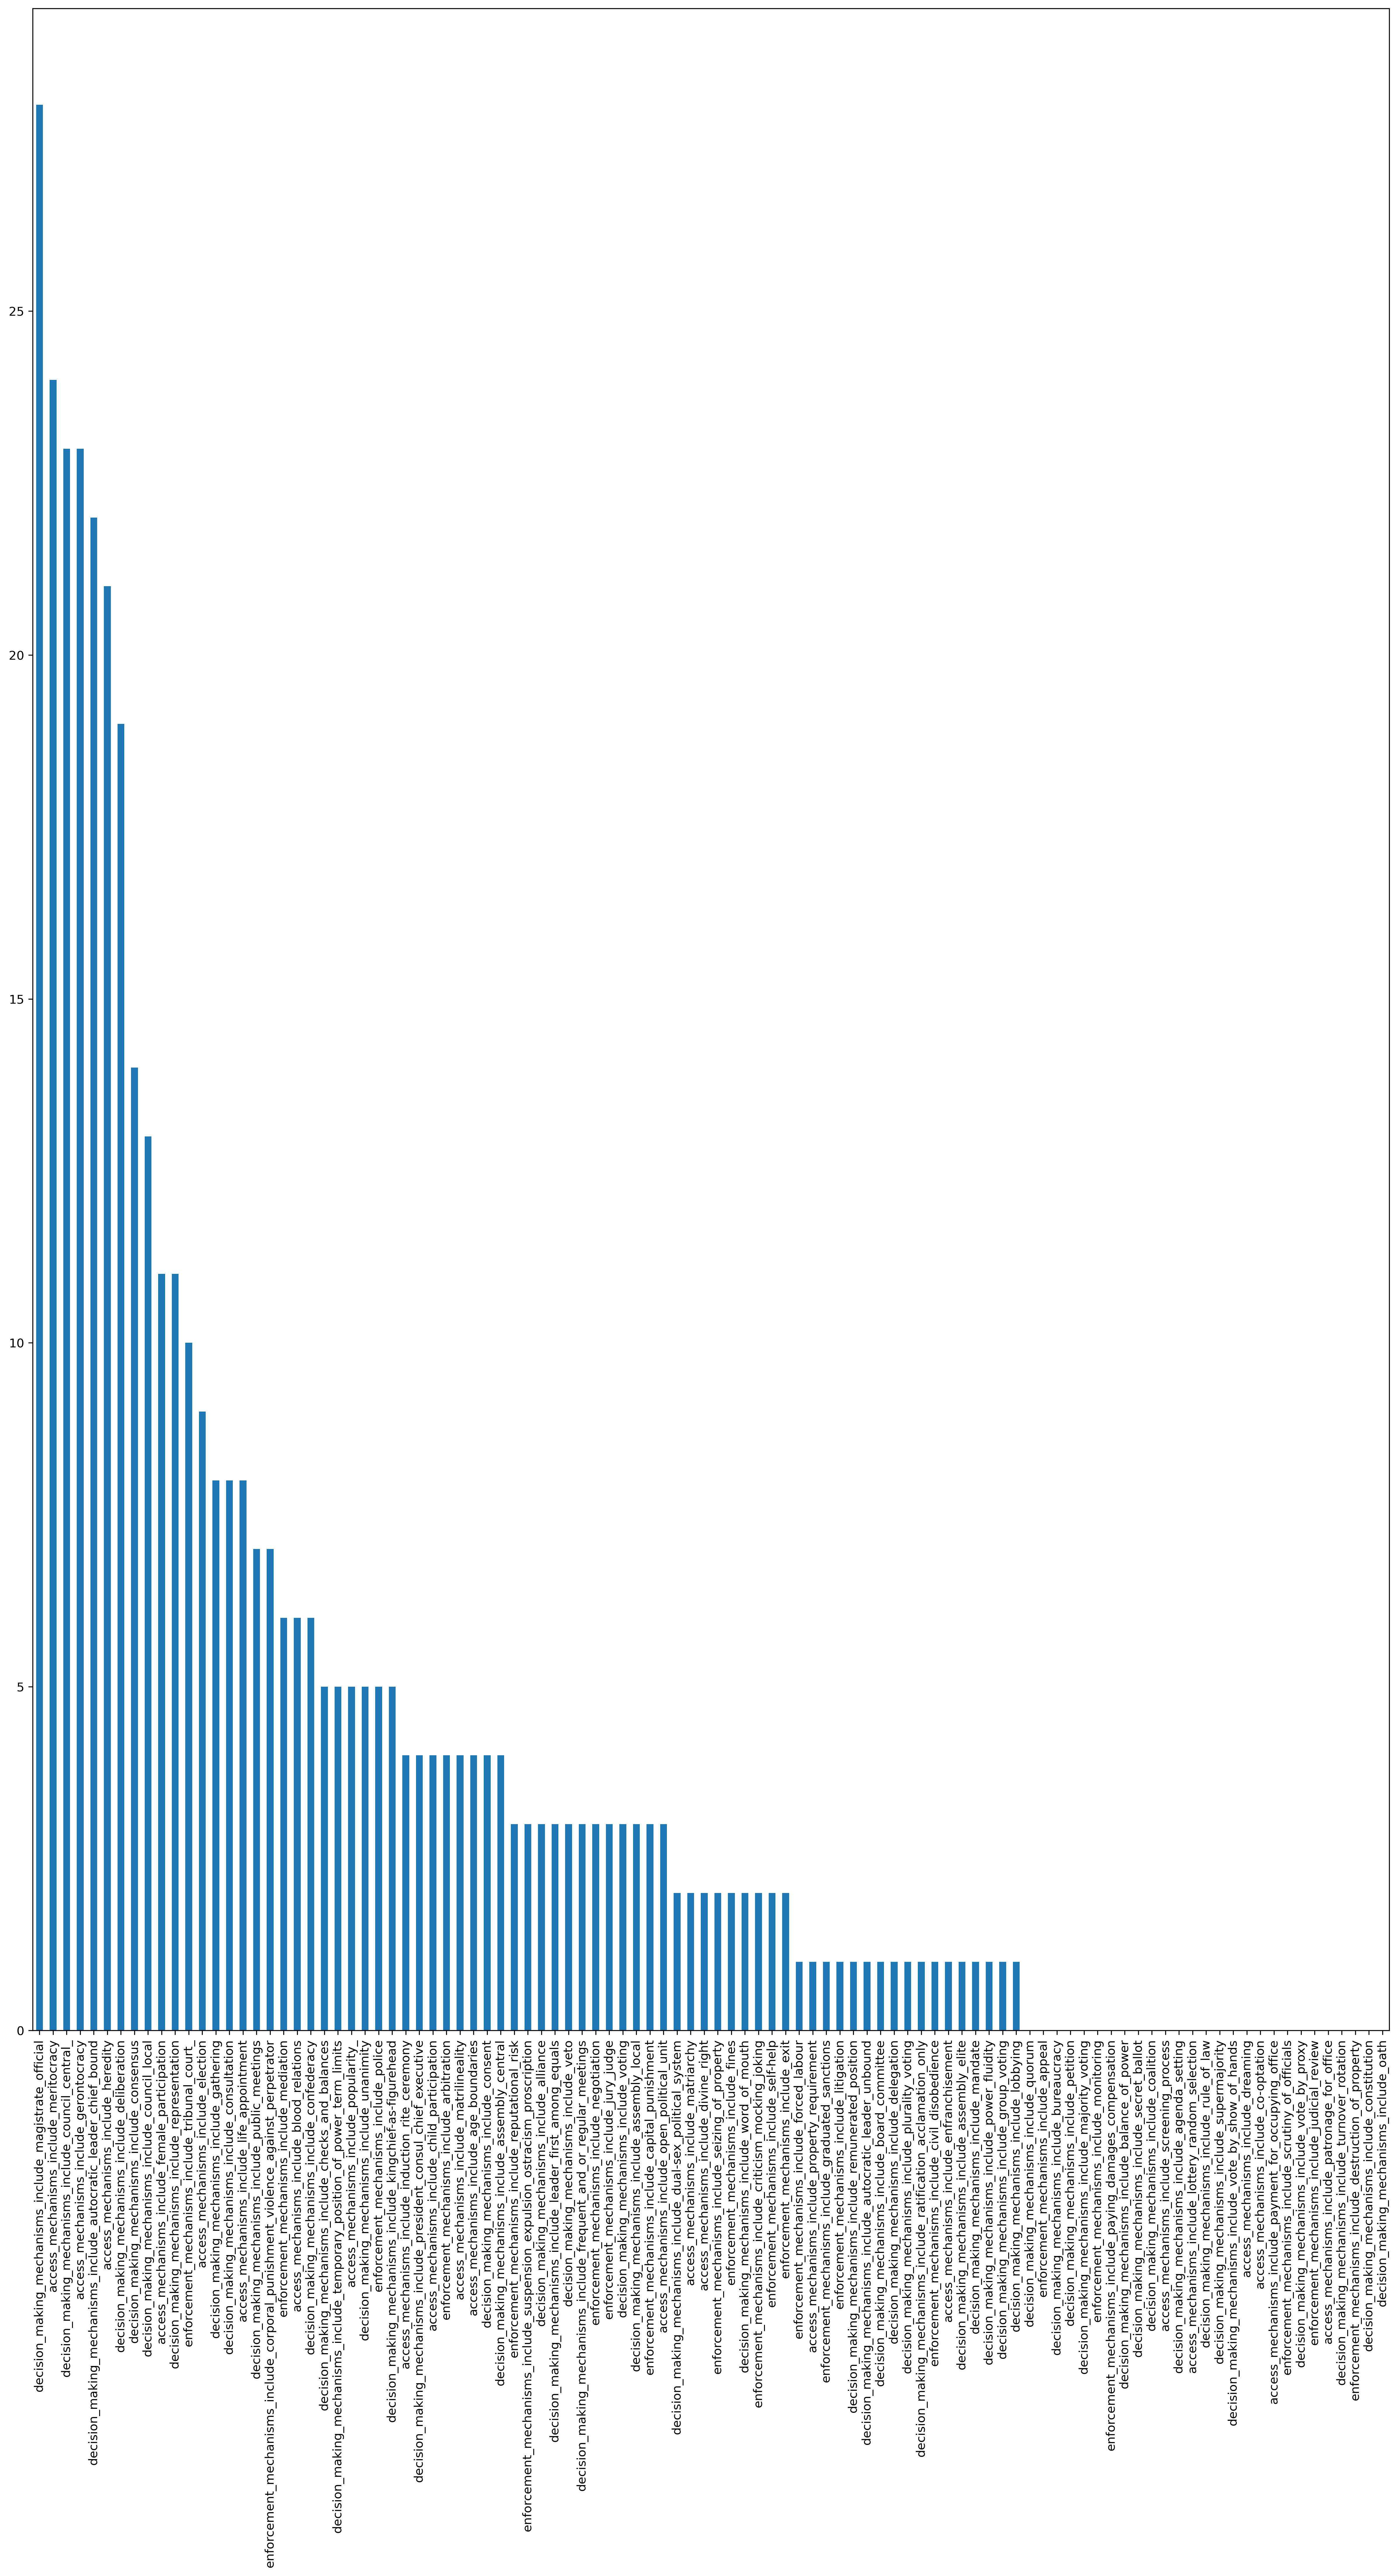

In [18]:
mechanisms_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,30))

## By Mechanism category

In [19]:
access_mechanisms = [x for x in gov_df.columns if 'access_mechanisms_' in x]

<Axes: >

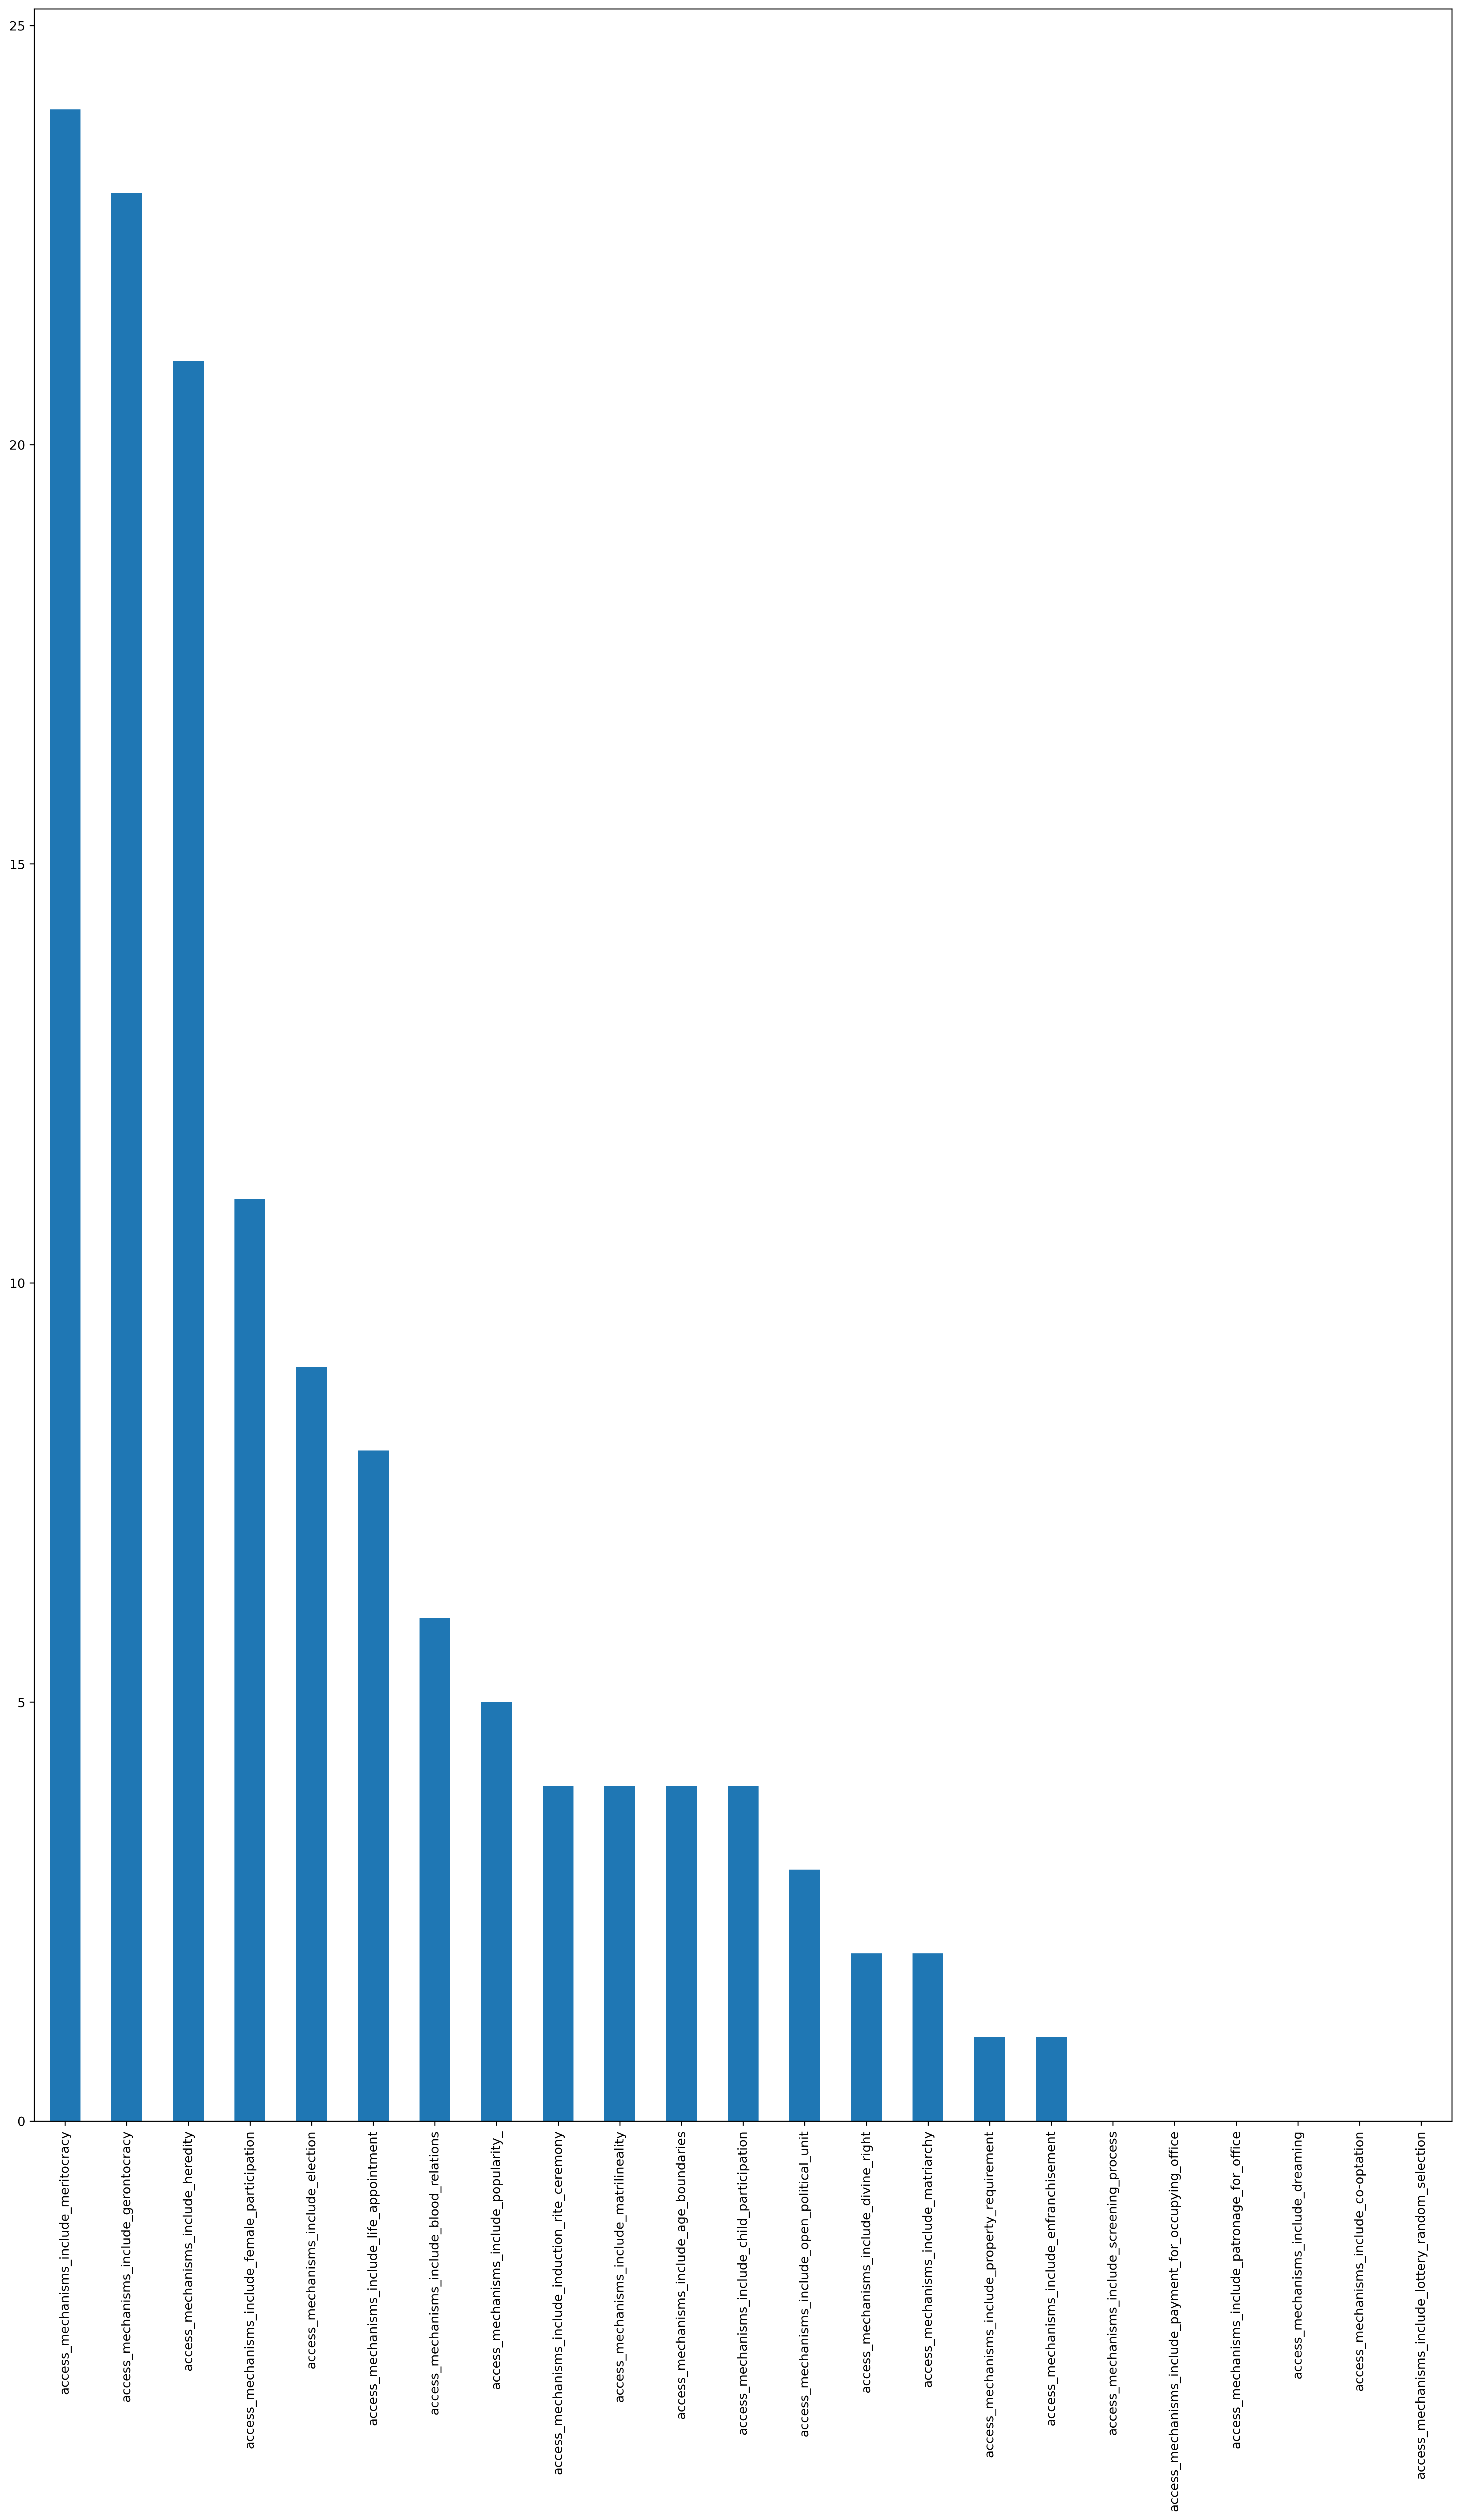

In [20]:
gov_df[access_mechanisms].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,30))

In [21]:
decision_making_mechanisms = [x for x in gov_df.columns if 'decision_making_mechanisms_' in x]

<Axes: >

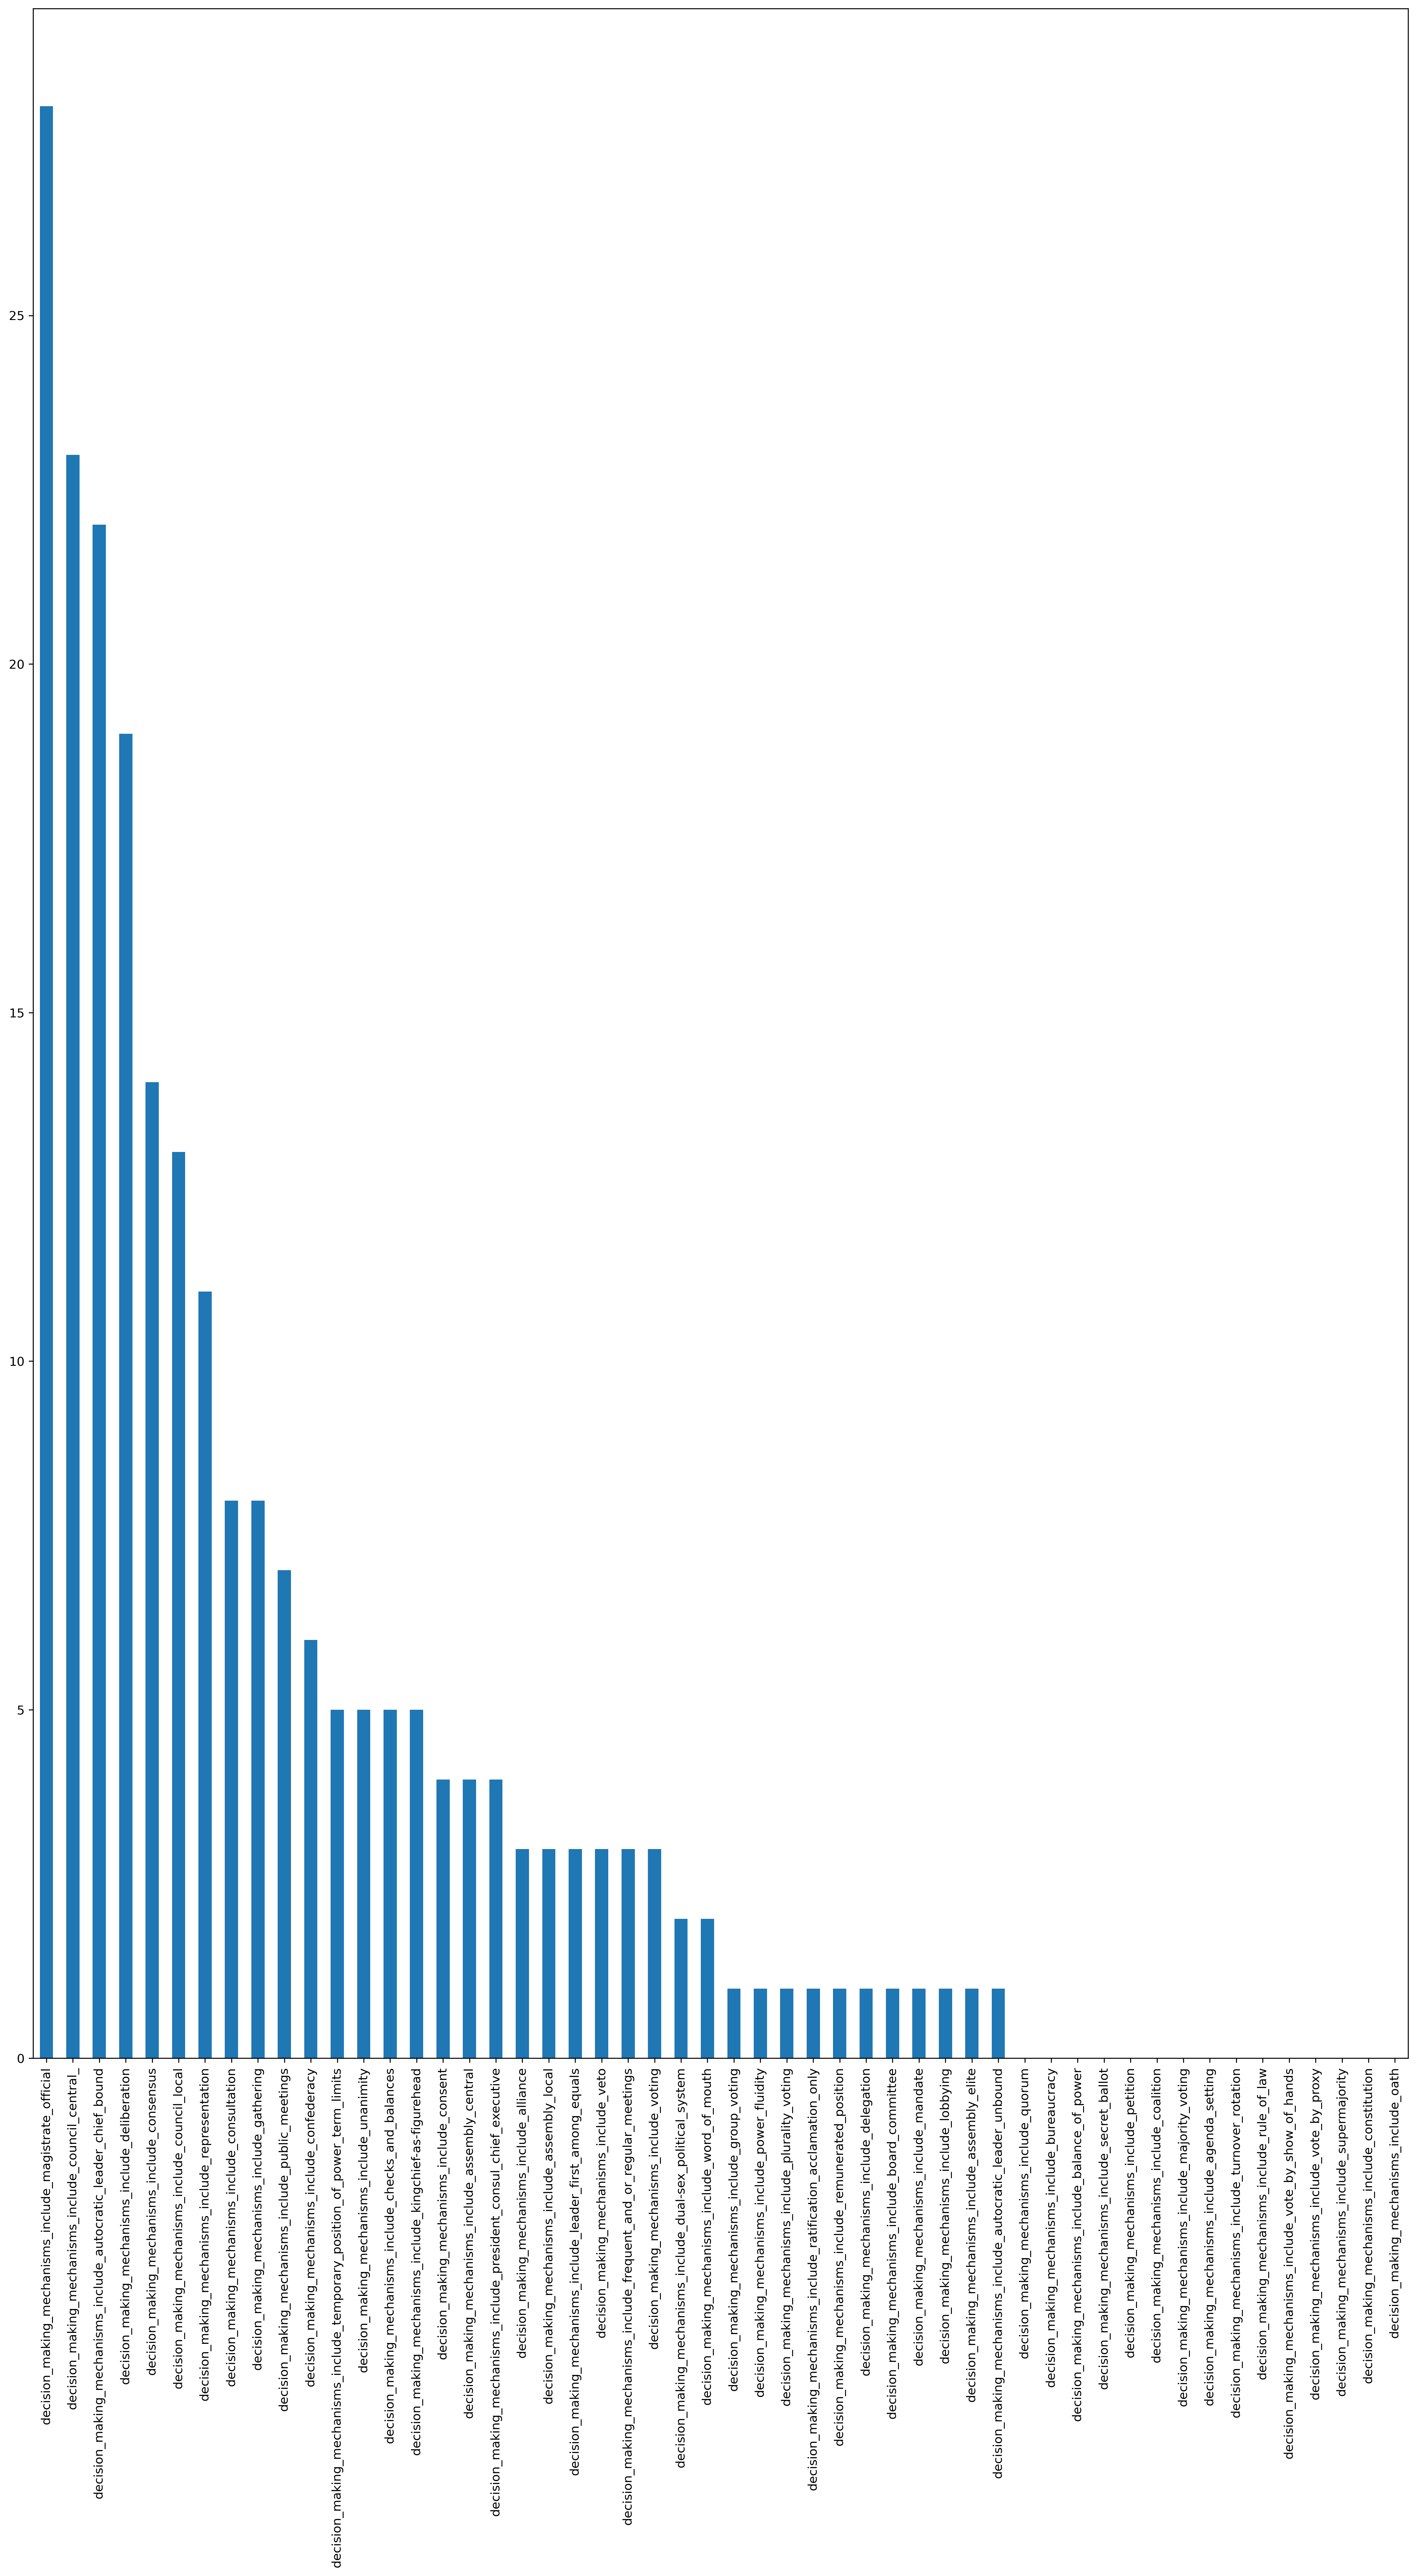

In [22]:
gov_df[decision_making_mechanisms].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,30))

In [23]:
enforcement_mechanisms = [x for x in gov_df.columns if 'enforcement_mechanisms_' in x]

<Axes: >

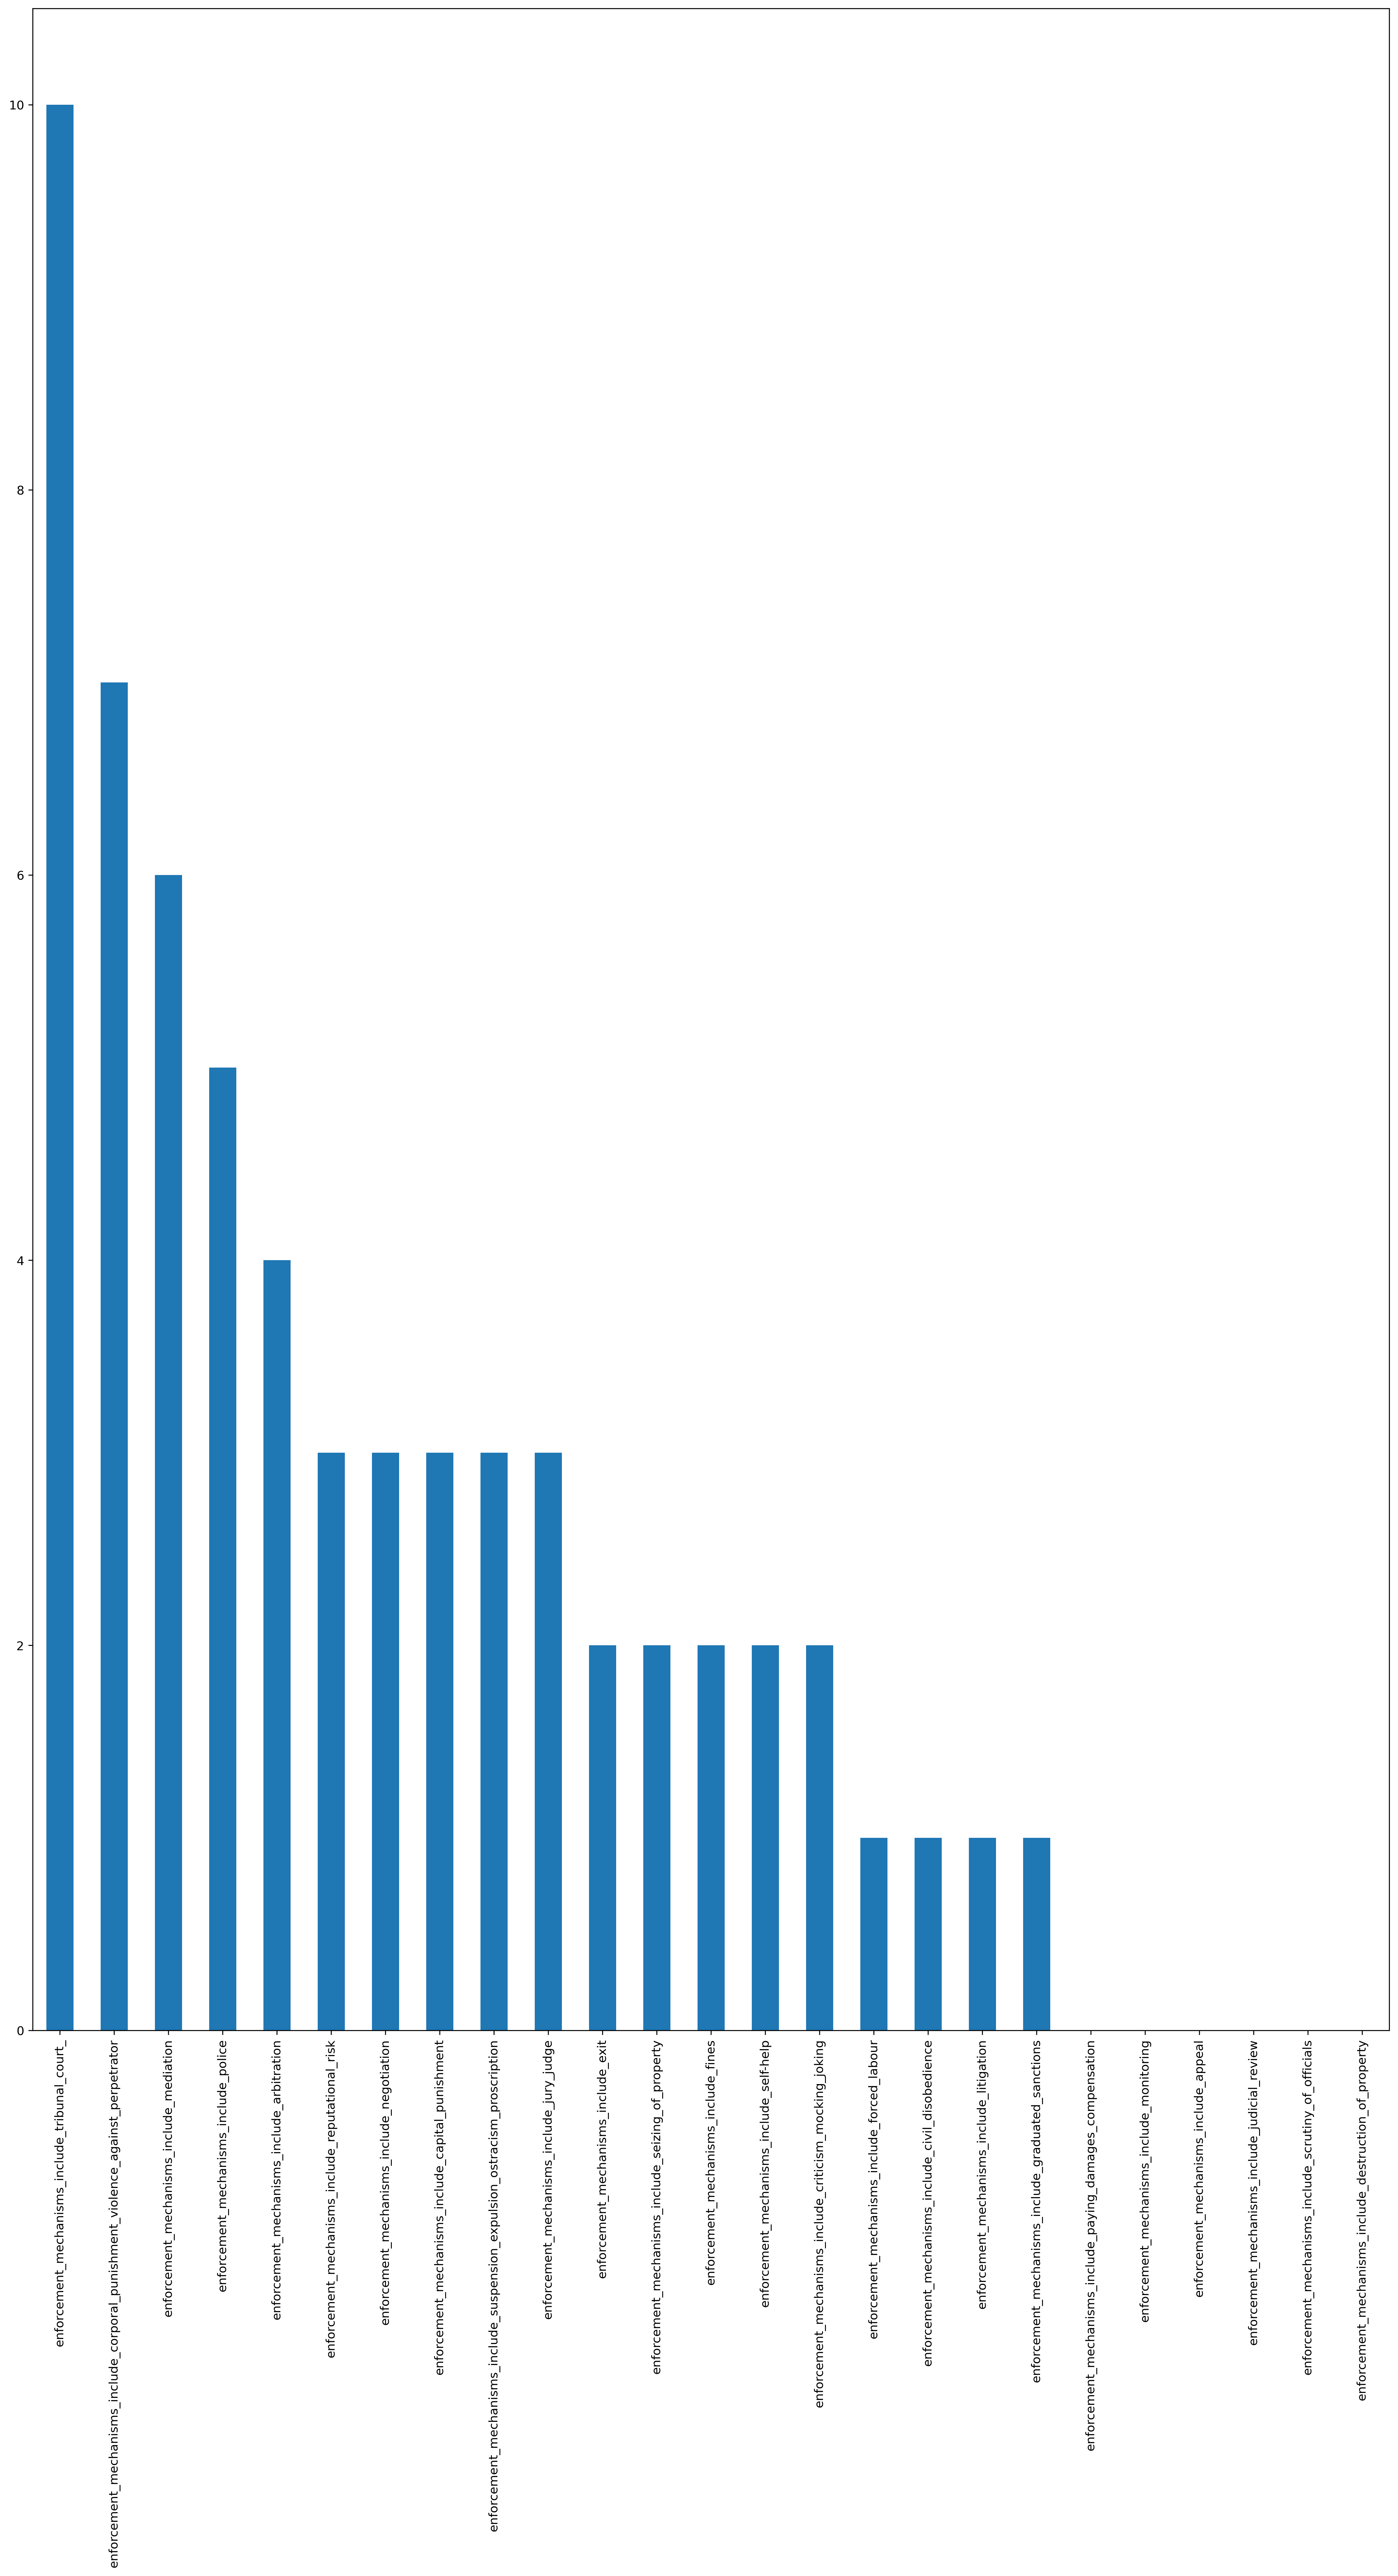

In [24]:
gov_df[enforcement_mechanisms].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,30))

### Values

In [25]:
# values_list = [x for x in gov_df.columns if x.startswith('values')]
# values_list

In [26]:
# values_df = gov_df[['Name'] + values_list]
# values_df = gov_df[values_list]

In [27]:
# values_df

In [28]:
# values_df.sum().sort_values(ascending=False)

In [29]:
# values_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,30))

Note:
- Mechanisms are not mutually exclusive! Many/most institutions involve multiple mechanisms.
- Values are also not mutually exclusive! Many/most institutions involve multiple values. 

### Size

In [30]:
gov_df['Size'].value_counts()

Size
1,001 - 10,000            15
10,001 - 100,000           9
100 - 1,000                4
1,000,001 - 10,000,000     2
100,001 - 1,000,000        2
Unknown                    2
Name: count, dtype: int64

In [31]:
gov_df['Size']

7           10,001 - 100,000
27    1,000,001 - 10,000,000
36            1,001 - 10,000
46            1,001 - 10,000
47            1,001 - 10,000
55            1,001 - 10,000
56    1,000,001 - 10,000,000
64          10,001 - 100,000
65            1,001 - 10,000
66       100,001 - 1,000,000
67          10,001 - 100,000
68            1,001 - 10,000
69          10,001 - 100,000
70          10,001 - 100,000
71          10,001 - 100,000
72          10,001 - 100,000
73               100 - 1,000
74            1,001 - 10,000
75            1,001 - 10,000
76            1,001 - 10,000
77            1,001 - 10,000
78                   Unknown
79                   Unknown
80       100,001 - 1,000,000
81               100 - 1,000
82               100 - 1,000
83            1,001 - 10,000
84            1,001 - 10,000
85          10,001 - 100,000
86            1,001 - 10,000
87            1,001 - 10,000
88               100 - 1,000
89          10,001 - 100,000
90            1,001 - 10,000
Name: Size, dt

<Axes: xlabel='Size'>

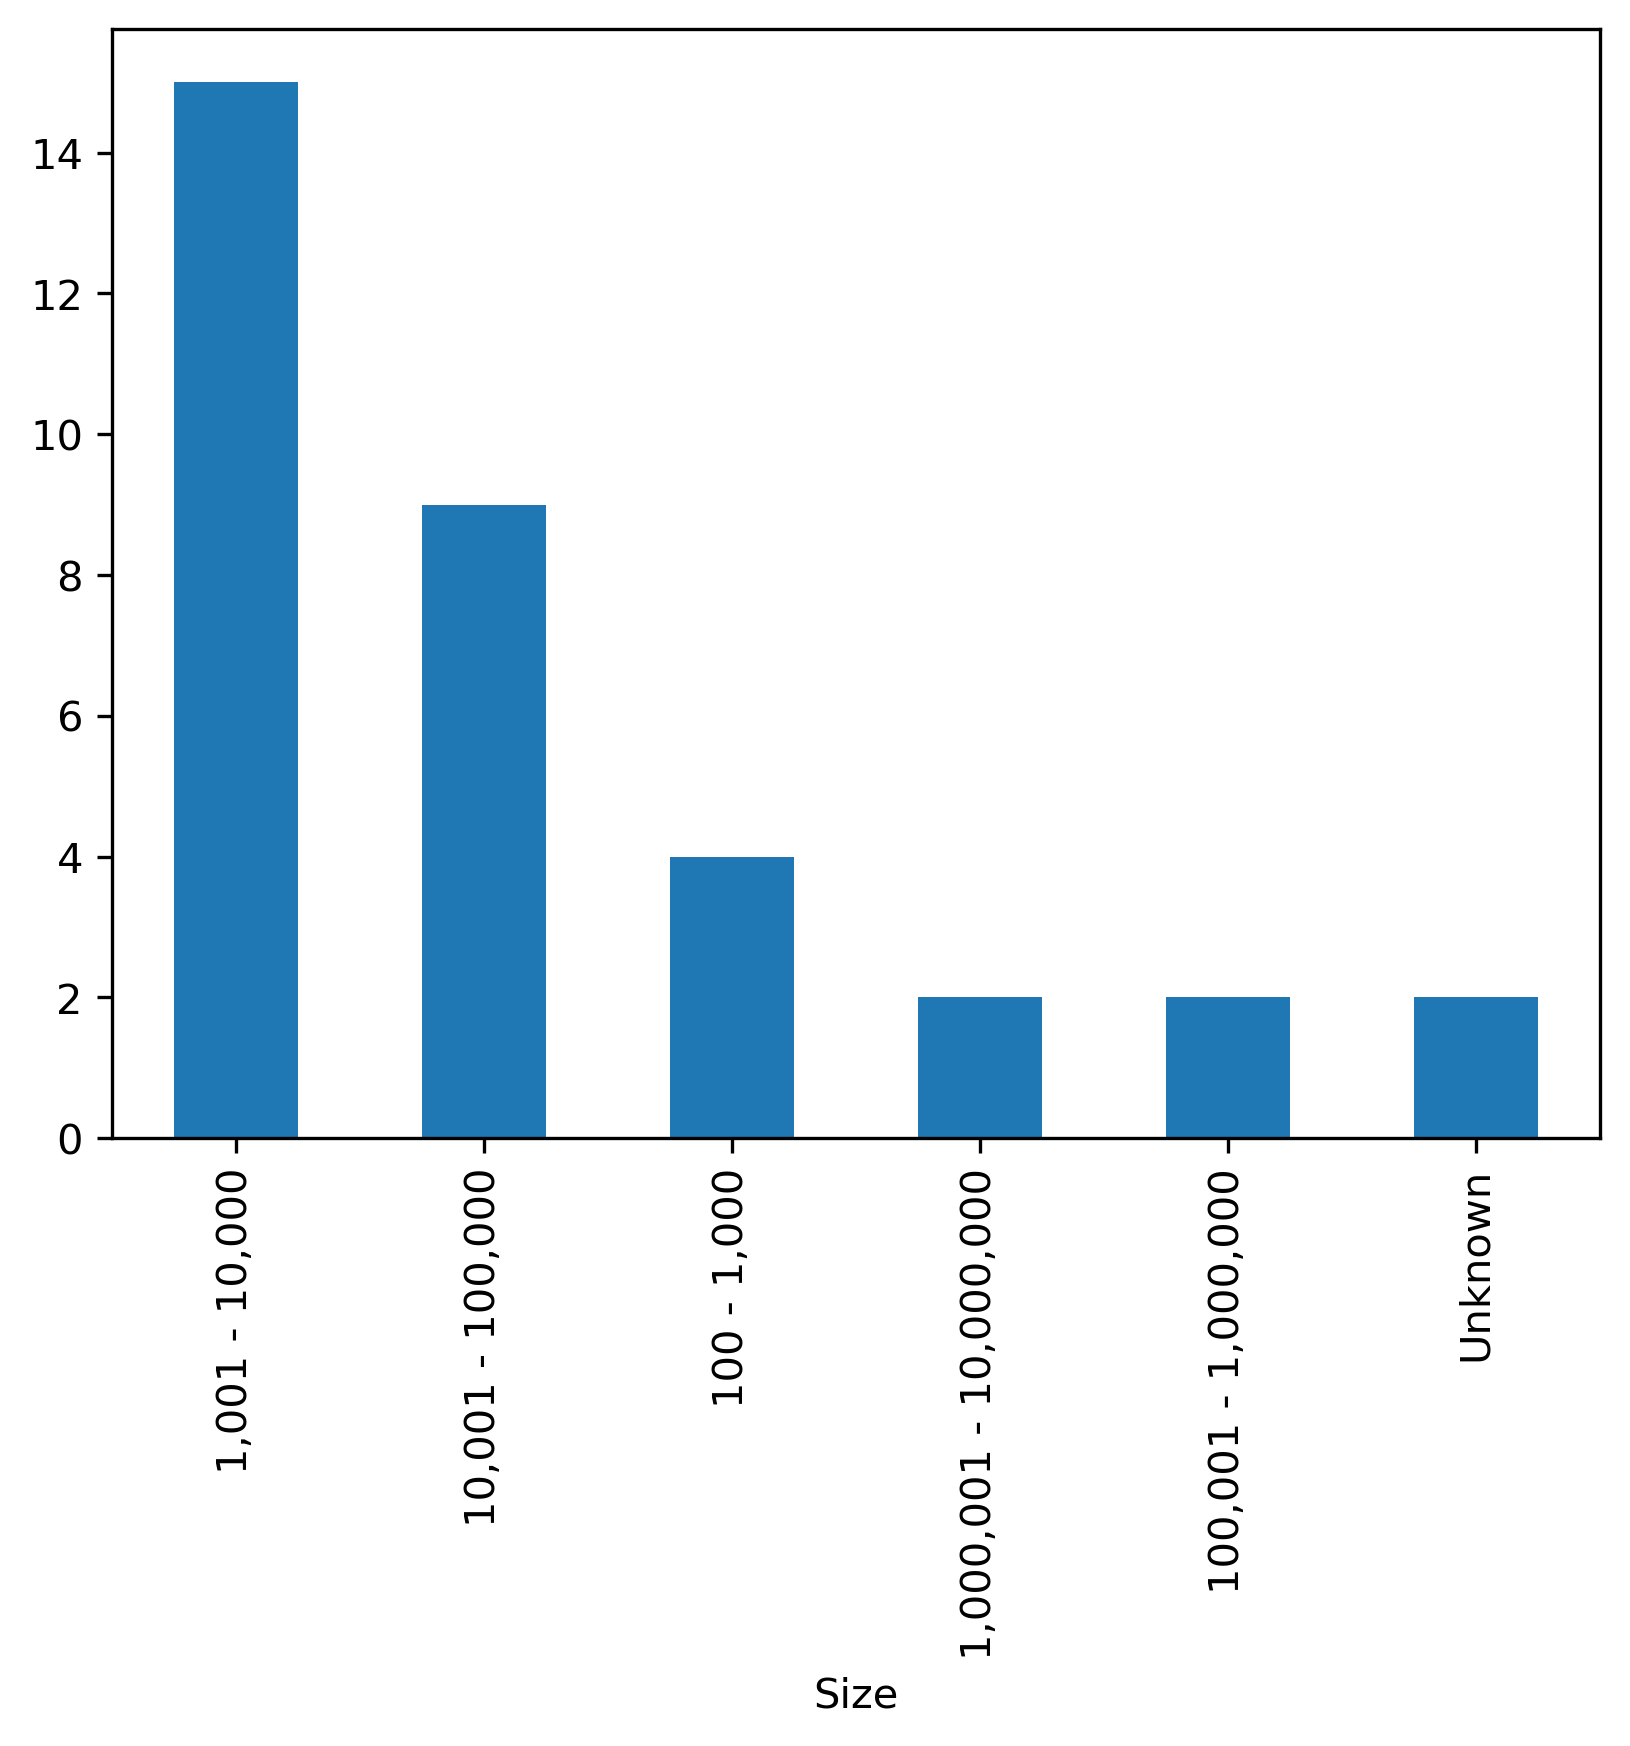

In [32]:
gov_df['Size'].value_counts().plot(kind='bar')

In [33]:
size_order = [
    '100 - 1,000',
    '1,001 - 10,000',
    '10,001 - 100,000',
    '100,001 - 1,000,000',
     # '1,000,001 - 10,000,000',
     # '10,000,000+',
    'Unknown'
]

In [34]:
gov_df.loc[gov_df['Size'] == 'Unknown']

Name                                       Institutions  \
78  Ashanti  Asante Hene,Chief,Queen Mother,Mpanyimfo,Kotok...   
79    Masai                                Enkigwana,Spokesman   

                                            Mechanism  \
78  Autocratic Leader/Chief (bound),Consultation,H...   
79  Council (central) ,Gerontocracy,Meritocracy,Ma...   

                         Notes               Time span Geography     Size  \
78  See notes (Mikayla folder)   17th -18th century AD    Africa  Unknown   
79  See notes (Mikayla folder)  16th - 17th century AD    Africa  Unknown   

                                               Source Metanotes  \
78  Arhin, K. (1967). The Structure of Greater Ash...       NaN   
79  Århem, K. (1985). The Maasai and the State: Th...       NaN   

   Heterogeneity  FC comments expert check  Time span: Start  Time span: End  \
78            NaN         NaN          NaN              1600            1800   
79            NaN         NaN          NaN              1500            1700   

   SCCS  is_SCCS  decision_making_mechanisms_include_representation  \
78  yes        1                                                  1   
79  yes        1                                                  0   

    enforcement_mechanisms_include_paying_damages_compensation  \
78                                                  0            
79                                                  0            

    decision_making_mechanisms_include_temporary_position_of_power_term_limits  \
78                                                  0                            
79                                                  0                            

    enforcement_mechanisms_include_forced_labour  \
78                                             0   
79                                             0   

    decision_making_mechanisms_include_remunerated_position  \
78                                                  0         
79                                                  0         

    access_mechanisms_include_property_requirement  \
78                                               0   
79                                               0   

    access_mechanisms_include_induction_rite_ceremony  \
78                                                  0   
79                                                  0   

    access_mechanisms_include_gerontocracy  \
78                                       1   
79                                       1   

    decision_making_mechanisms_include_majority_voting  \
78                                                  0    
79                                                  0    

    enforcement_mechanisms_include_graduated_sanctions  \
78                                                  0    
79                                                  0    

    decision_making_mechanisms_include_plurality_voting  \
78                                                  0     
79                                                  0     

    enforcement_mechanisms_include_monitoring  \
78                                          0   
79                                          0   

    decision_making_mechanisms_include_assembly_local  \
78                                                  0   
79                                                  0   

    decision_making_mechanisms_include_petition  \
78                                            0   
79                                            0   

    access_mechanisms_include_enfranchisement  \
78                                          0   
79                                          0   

    access_mechanisms_include_age_boundaries  \
78                                         0   
79                                         1   

    enforcement_mechanisms_include_exit  \
78                                    0   
79                                    0   

    decision_making_mechanisms_include_secret_ballot  \

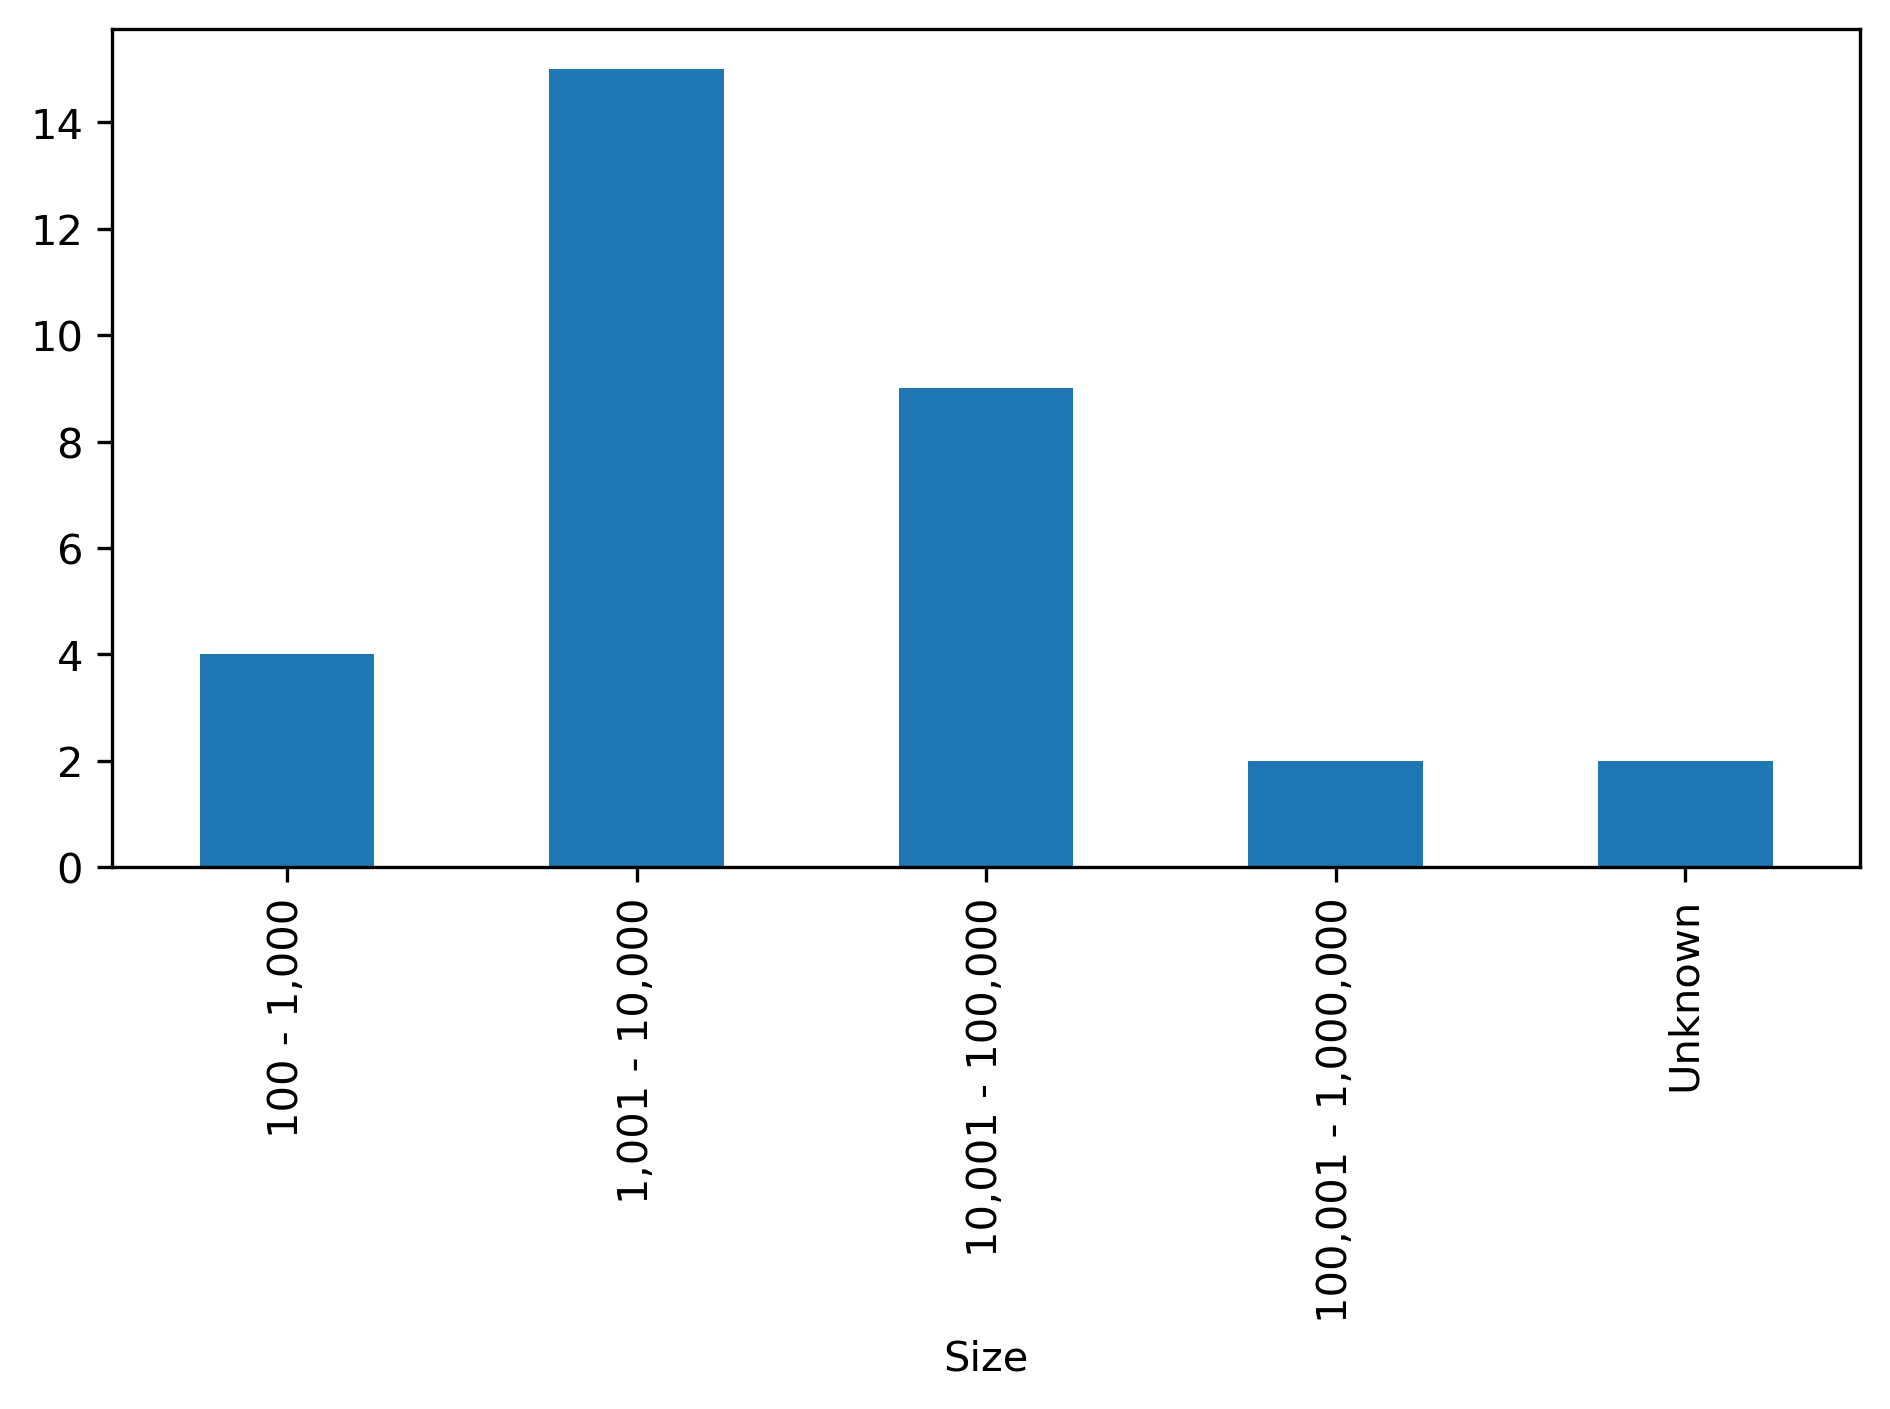

In [35]:
gov_df['Size'].value_counts().loc[size_order].plot.bar()

plt.tight_layout()
plt.savefig(fig_dir + 'communities_histogram_size.png')
plt.show()

In [36]:
gov_df['Size']

7           10,001 - 100,000
27    1,000,001 - 10,000,000
36            1,001 - 10,000
46            1,001 - 10,000
47            1,001 - 10,000
55            1,001 - 10,000
56    1,000,001 - 10,000,000
64          10,001 - 100,000
65            1,001 - 10,000
66       100,001 - 1,000,000
67          10,001 - 100,000
68            1,001 - 10,000
69          10,001 - 100,000
70          10,001 - 100,000
71          10,001 - 100,000
72          10,001 - 100,000
73               100 - 1,000
74            1,001 - 10,000
75            1,001 - 10,000
76            1,001 - 10,000
77            1,001 - 10,000
78                   Unknown
79                   Unknown
80       100,001 - 1,000,000
81               100 - 1,000
82               100 - 1,000
83            1,001 - 10,000
84            1,001 - 10,000
85          10,001 - 100,000
86            1,001 - 10,000
87            1,001 - 10,000
88               100 - 1,000
89          10,001 - 100,000
90            1,001 - 10,000
Name: Size, dt

### Geography 

In [37]:
gov_df['Geography'].value_counts()

Geography
North America                          8
Africa                                 5
South America, Brazil                  2
Asia, South                            2
North America, Canada                  2
Africa South                           1
Middle East, Mesopotamia, Babylonia    1
Africa West, Mid-western Nigeria       1
South America, Venezuela/Brazil        1
North America, Louisiana               1
Europe South, Italy                    1
South America, Patagonia               1
Oceania, eastern Polynesia             1
Oceania, New Zealand                   1
Oceania, New Caledonia                 1
Oceania, samoa                         1
Asia, East                             1
Oceania, Kiribati                      1
North America, Alaska                  1
Central America                        1
Name: count, dtype: int64

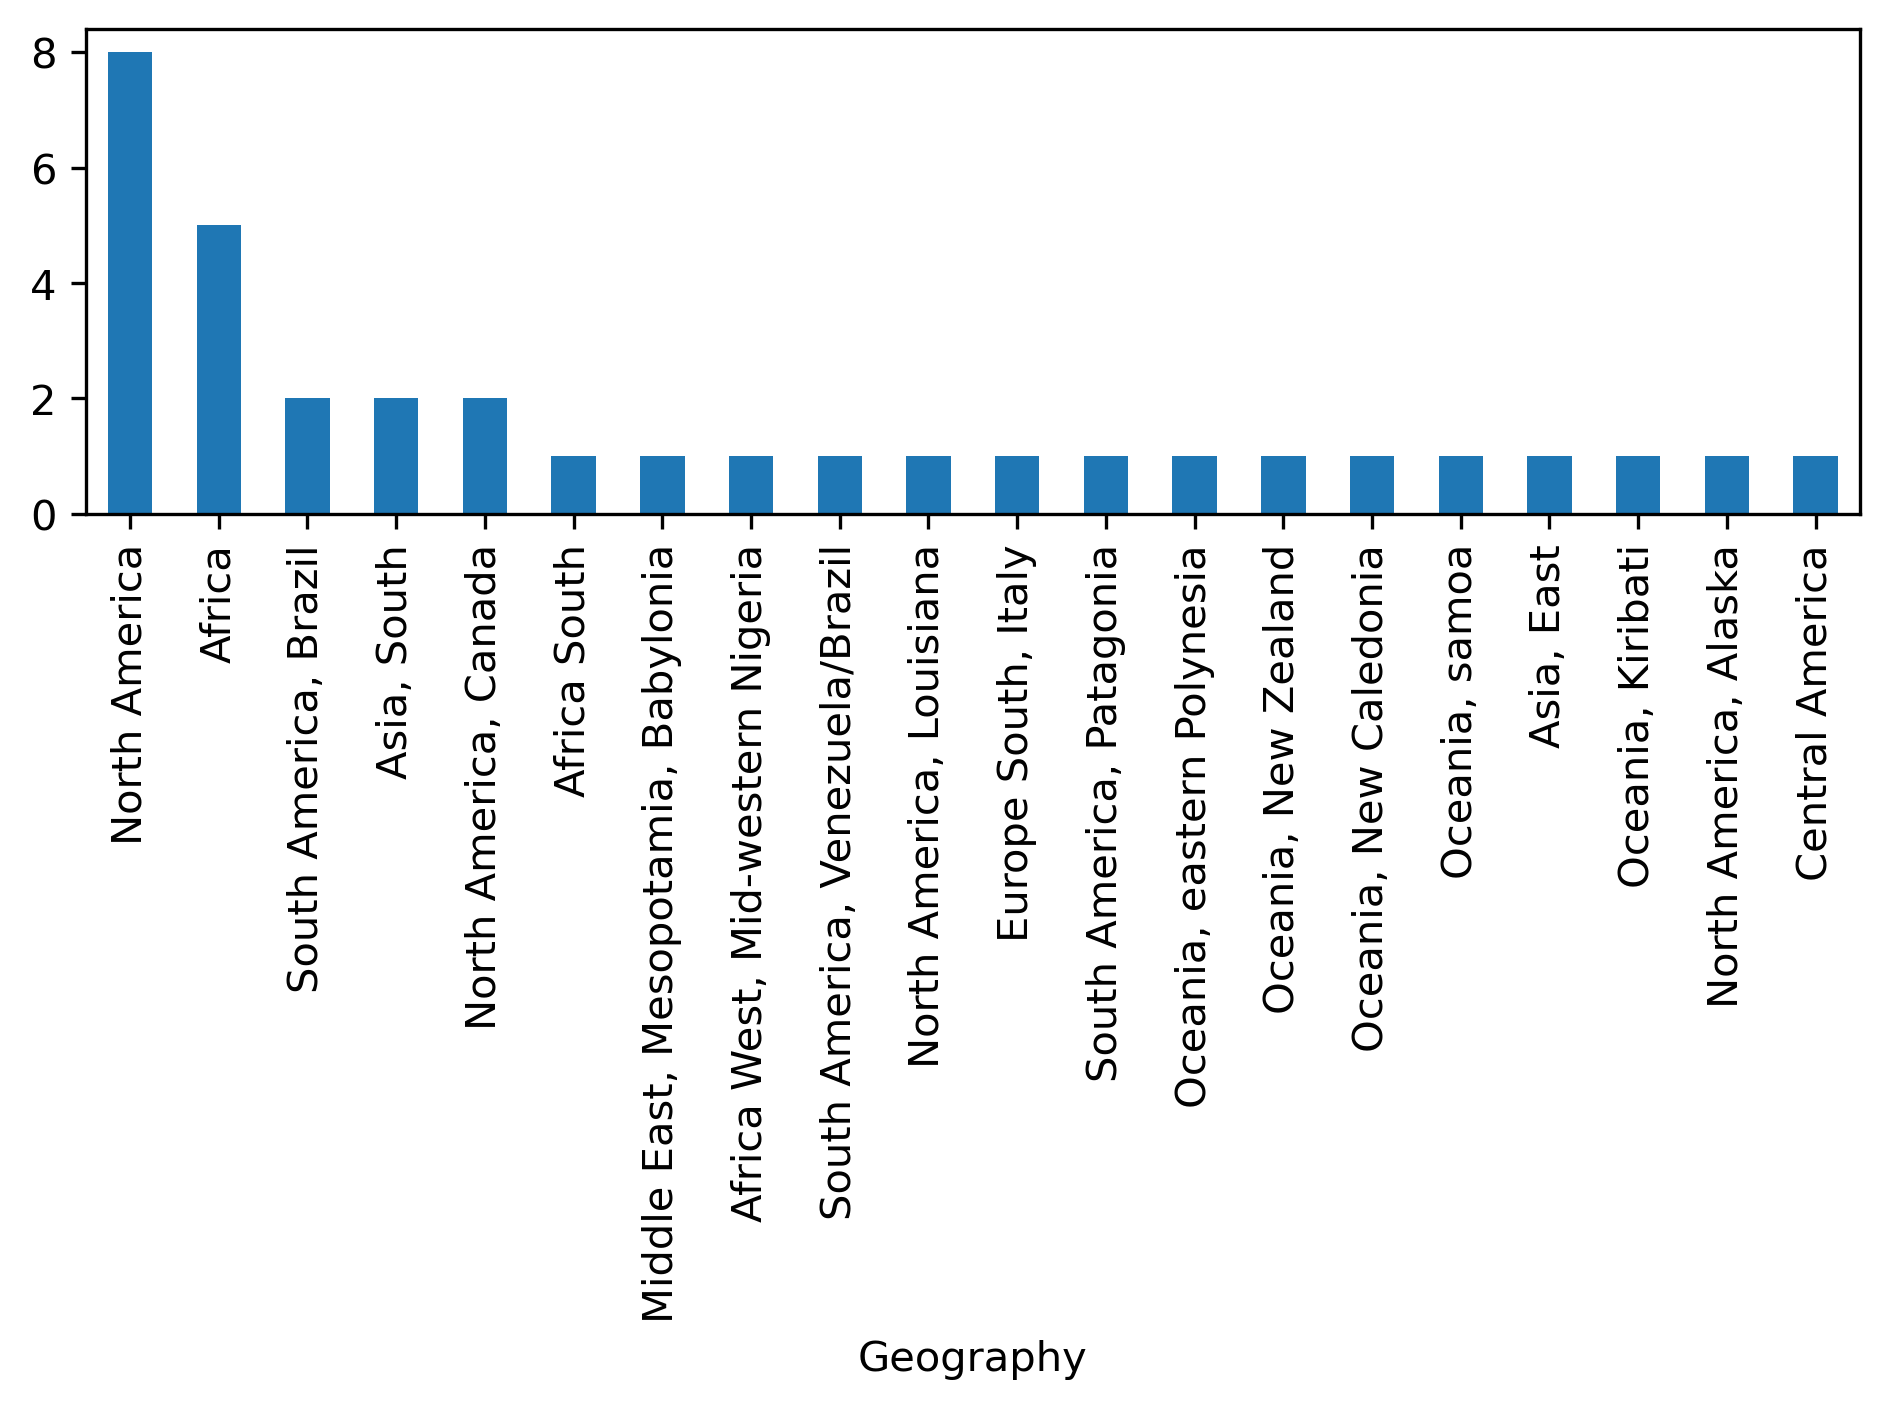

In [38]:
gov_df['Geography'].value_counts().plot(kind='bar')

plt.tight_layout()
plt.savefig(fig_dir + 'communities_histogram_geography.png')
plt.show()

In [39]:
"""
- Africa
- Europe
- Asia
- Middle East
- North America
- Central America
- South America
- Oceania
"""

'\n- Africa\n- Europe\n- Asia\n- Middle East\n- North America\n- Central America\n- South America\n- Oceania\n'

In [40]:
gov_df['Geography']

7     Middle East, Mesopotamia, Babylonia
27       Africa West, Mid-western Nigeria
36                           Africa South
46                  South America, Brazil
47               North America, Louisiana
55                          North America
56                    Europe South, Italy
64                          North America
65               South America, Patagonia
66                  South America, Brazil
67        South America, Venezuela/Brazil
68                 Oceania, New Caledonia
69                   Oceania, New Zealand
70             Oceania, eastern Polynesia
71                         Oceania, samoa
72                      Oceania, Kiribati
73                            Asia, South
74                            Asia, South
75                             Asia, East
76                                 Africa
77                                 Africa
78                                 Africa
79                                 Africa
80                                

### Geography 

In [41]:
gov_df.head()

Name                                       Institutions  \
7              Babylonia  Governor,Council of Elders,The citizens/The As...   
27           Igbo People  Omu,Obi,Ikporo Ani,Onotu,Ilogo,Awo,Otu umuada,...   
36  Kung San (Ju/hoansi)                         Hxaro,Headman,Group,Kgotla   
46            Nambikuara                                     Uilikande,Band   
47        Natchez people        Great Sun,War Council,Governor of districts   

                                            Mechanism  \
7   Assembly (central),Checks and balances,Consent...   
27  Dual-sex political system,Matriarchy,Assembly ...   
36  Leader (first among equals),Deliberation,Corpo...   
46  Leader (first among equals),Meritocracy,Reputa...   
47  Autocratic Leader (unbound),Self-help,Capital ...   

                                                Notes  \
7   The city-states of southern Mesopotamia in the...   
27  Peggy Sanday (1981)\n\tThe obi is the head of...   
36  Hxaro - System of mutual reciprocity and socia...   
46  CASE USED BY G&W TO DISCUSS SEASONALITY BUT NO...   
47  o\tKingship\n\no\tMinimal bureaucracy\n\no\tNo...   

                                        Time span  \
7                             9th-7th century BC    
27              10th -16th century AD\n(900-1560)   
36  20th century - Present\n(dates are arbitrary)   
46                         20th century - present   
47                                18th century AD   

                              Geography                    Size  \
7   Middle East, Mesopotamia, Babylonia        10,001 - 100,000   
27     Africa West, Mid-western Nigeria  1,000,001 - 10,000,000   
36                         Africa South          1,001 - 10,000   
46                South America, Brazil          1,001 - 10,000   
47             North America, Louisiana          1,001 - 10,000   

                                               Source  \
7   Larsen, The City-States of the Early Neo-Babyl...   
27  Peggy Sanday, Female Power and Male Dominance ...   
36  Polly Wiessner (1982), Risk, reciprocity and s...   
46  Lévi-Strauss, (1967), The Social and Political...   
47  Graeber, David and David Wengrow (2021), The D...   

                                            Metanotes  \
7                                                 NaN   
27  HETEROGENEITY\nFormal inclusion of both sexes ...   
36  Standing in for small-scale egalitarian bands....   
46                                                NaN   
47  Population: "on top of one of them was a Templ...   

                                       Heterogeneity   \
7                                                 NaN   
27  Gender groups,Inclusion through different inst...   
36                                                NaN   
46                                                NaN   
47                                                NaN   

                                          FC comments     expert check  \
7                                       Edited Mar 23  Giacomo CHECKED   
27  Edited Apr 23 (the sources focus overwhelmingl...              NaN   
36                                    Edited April 23              NaN   
46                                      Edited May 23              NaN   
47                  Edited May 23 (can use MORE INFO)              NaN   

    Time span: Start  Time span: End SCCS  is_SCCS  \
7               -900            -600  yes        1   
27               900            1560  yes        1   
36              1900            2023  yes        1   
46              1900            2000  yes        1   
47              1700            1800  yes        1   

    decision_making_mechanisms_include_representation  \
7                                                   0   
27                                                  1   
36                                                  0   
46                                                  0   
47                                                  0

In [42]:
gov_df['Region'].value_counts()

Region
North America      12
Africa              7
Oceania             5
South America       4
Asia                3
Middle East         1
Europe              1
Central America     1
Name: count, dtype: int64

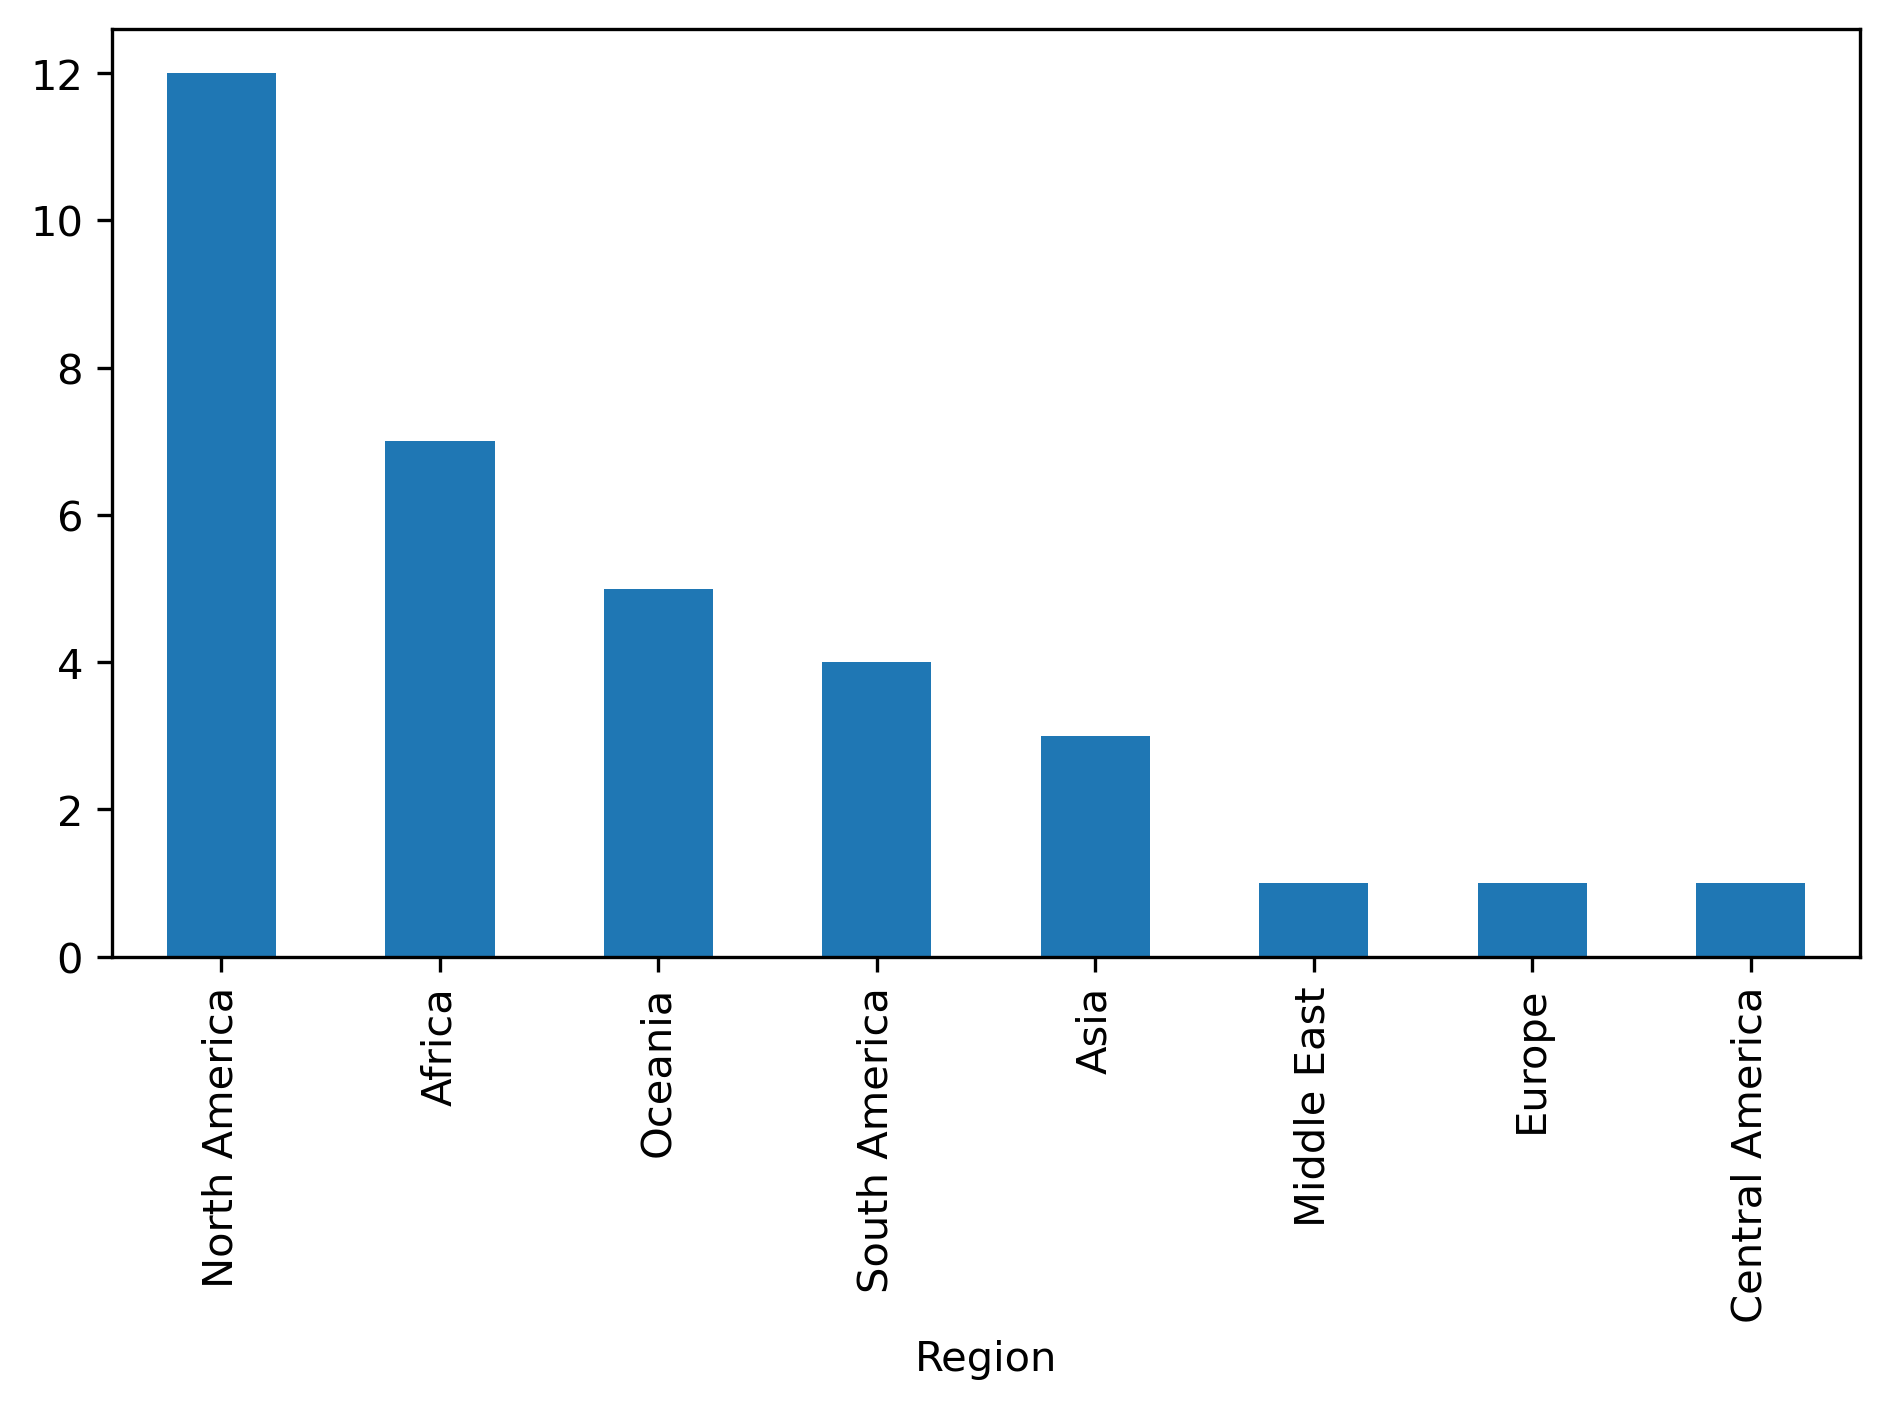

In [43]:
gov_df['Region'].value_counts().plot(kind='bar')

plt.tight_layout()
plt.savefig(fig_dir + 'communities_histogram_region.png')
plt.show()

Notes:
- Overrepresentation of European communities
- Need more representation of Oceania and Pacific Islanders, South America, Central America! 

## Mapping geographies


### Prep world map data to match the regions we have 

In [44]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_2605/3744710904.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [45]:
worldmap

pop_est                continent                      name iso_a3  \
0    8.899530e+05                  Oceania                      Fiji    FJI   
1    5.800546e+07                   Africa                  Tanzania    TZA   
2    6.032530e+05                   Africa                 W. Sahara    ESH   
3    3.758926e+07            North America                    Canada    CAN   
4    3.282395e+08            North America  United States of America    USA   
5    1.851393e+07                     Asia                Kazakhstan    KAZ   
6    3.358065e+07                     Asia                Uzbekistan    UZB   
7    8.776109e+06                  Oceania          Papua New Guinea    PNG   
8    2.706256e+08                     Asia                 Indonesia    IDN   
9    4.493871e+07            South America                 Argentina    ARG   
10   1.895204e+07            South America                     Chile    CHL   
11   8.679057e+07                   Africa           Dem. Rep. Congo    COD   
12   1.019232e+07                   Africa                   Somalia    SOM   
13   5.257397e+07                   Africa                     Kenya    KEN   
14   4.281324e+07                   Africa                     Sudan    SDN   
15   1.594688e+07                   Africa                      Chad    TCD   
16   1.126308e+07            North America                     Haiti    HTI   
17   1.073896e+07            North America            Dominican Rep.    DOM   
18   1.443735e+08                   Europe                    Russia    RUS   
19   3.894820e+05            North America                   Bahamas    BHS   
20   3.398000e+03            South America              Falkland Is.    FLK   
21   5.347896e+06                   Europe                    Norway    NOR   
22   5.622500e+04            North America                 Greenland    GRL   
23   1.400000e+02  Seven seas (open ocean)    Fr. S. Antarctic Lands    ATF   
24   1.293119e+06                     Asia               Timor-Leste    TLS   
25   5.855827e+07                   Africa              South Africa    ZAF   
26   2.125268e+06                   Africa                   Lesotho    LSO   
27   1.275755e+08            North America                    Mexico    MEX   
28   3.461734e+06            South America                   Uruguay    URY   
29   2.110495e+08            South America                    Brazil    BRA   
30   1.151310e+07            South America                   Bolivia    BOL   
31   3.251045e+07            South America                      Peru    PER   
32   5.033944e+07            South America                  Colombia    COL   
33   4.246439e+06            North America                    Panama    PAN   
34   5.047561e+06            North America                Costa Rica    CRI   
35   6.545502e+06            North America                 Nicaragua    NIC   
36   9.746117e+06            North America                  Honduras    HND   
37   6.453553e+06            North America               El Salvador    SLV   
38   1.660403e+07            North America                 Guatemala    GTM   
39   3.903530e+05            North America                    Belize    BLZ   
40   2.851583e+07            South America                 Venezuela    VEN   
41   7.827660e+05            South America                    Guyana    GUY   
42   5.813630e+05            South America                  Suriname    SUR   
43   6.705989e+07                   Europe                    France    FRA   
44   1.737366e+07            South America                   Ecuador    ECU   
45   3.193694e+06            North America               Puerto Rico    PRI   
46   2.948279e+06            North America                   Jamaica    JAM   
47   1.133348e+07            North America                      Cuba    CUB   
48   1.464547e+07                   Africa                  Zimbabwe    ZWE   
49   2.303697e+06                   Africa                  

In [46]:
sorted(list(worldmap['name']))

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominican Rep.',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Is.',
 'Fiji',
 'Finland',
 'Fr. S. Antarctic Lands',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy

In [47]:
central_america_countries = [
    'Belize',
    'Costa Rica',
    'El Salvador',
    'Guatemala',
    'Honduras',
    'Nicaragua',
    'Panama'
]

In [48]:
middle_east_countries = [
    'Cyprus',
    'Egypt',
    'Iran',
    'Iraq',
    'Israel',
    'Jordan',
    'Kuwait',
    'Lebanon',
    'Oman',
    'Palestine',
    'Qatar',
    'Saudi Arabia',
    'Syria',
    'Turkey',
    'United Arab Emirates',
    'Yemen'
]

In [49]:
worldmap['name'].isin(central_america_countries)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [50]:
# Add region for Central America
worldmap.loc[(worldmap['name'].isin(central_america_countries)), 'continent'] = 'Central America'

In [51]:
worldmap.loc[(worldmap['continent'] == 'Central America')]

pop_est        continent         name iso_a3  gdp_md_est  \
33   4246439.0  Central America       Panama    PAN       66800   
34   5047561.0  Central America   Costa Rica    CRI       61801   
35   6545502.0  Central America    Nicaragua    NIC       12520   
36   9746117.0  Central America     Honduras    HND       25095   
37   6453553.0  Central America  El Salvador    SLV       27022   
38  16604026.0  Central America    Guatemala    GTM       76710   
39    390353.0  Central America       Belize    BLZ        1879   

                                             geometry  
33  POLYGON ((-77.35336 8.67050, -77.47472 8.52429...  
34  POLYGON ((-82.54620 9.56613, -82.93289 9.47681...  
35  POLYGON ((-83.65561 10.93876, -83.89505 10.726...  
36  POLYGON ((-83.14722 14.99583, -83.48999 15.016...  
37  POLYGON ((-89.35333 14.42413, -89.05851 14.340...  
38  POLYGON ((-92.22775 14.53883, -92.20323 14.830...  
39  POLYGON ((-89.14308 17.80832, -89.15091 17.955...

In [52]:
# Add region for Middle East
worldmap.loc[(worldmap['name'].isin(middle_east_countries)), 'continent'] = 'Middle East'

In [53]:
worldmap.loc[(worldmap['continent'] == 'Middle East')]

pop_est    continent                  name iso_a3  gdp_md_est  \
76     9053300.0  Middle East                Israel    ISR      394652   
77     6855713.0  Middle East               Lebanon    LBN       51991   
79     4685306.0  Middle East             Palestine    PSE       16276   
83    10101694.0  Middle East                Jordan    JOR       44502   
84     9770529.0  Middle East  United Arab Emirates    ARE      421142   
85     2832067.0  Middle East                 Qatar    QAT      175837   
86     4207083.0  Middle East                Kuwait    KWT      134628   
87    39309783.0  Middle East                  Iraq    IRQ      234094   
88     4974986.0  Middle East                  Oman    OMN       76331   
107   82913906.0  Middle East                  Iran    IRN      453996   
108   17070135.0  Middle East                 Syria    SYR       98830   
124   83429615.0  Middle East                Turkey    TUR      761425   
157   29161922.0  Middle East                 Yemen    YEM       22581   
158   34268528.0  Middle East          Saudi Arabia    SAU      792966   
161    1198575.0  Middle East                Cyprus    CYP       24948   
163  100388073.0  Middle East                 Egypt    EGY      303092   

                                              geometry  
76   POLYGON ((35.71992 32.70919, 35.54567 32.39399...  
77   POLYGON ((35.82110 33.27743, 35.55280 33.26427...  
79   POLYGON ((35.39756 31.48909, 34.92741 31.35344...  
83   POLYGON ((35.54567 32.39399, 35.71992 32.70919...  
84   POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
85   POLYGON ((50.81011 24.75474, 50.74391 25.48242...  
86   POLYGON ((47.97452 29.97582, 48.18319 29.53448...  
87   POLYGON ((39.19547 32.16101, 38.79234 33.37869...  
88   MULTIPOLYGON (((55.20834 22.70833, 55.23449 23...  
107  POLYGON ((48.56797 29.92678, 48.01457 30.45246...  
108  POLYGON ((35.71992 32.70919, 35.70080 32.71601...  
124  MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...  
157  POLYGON ((52.00001 19.00000, 52.78218 17.34974...  
158  POLYGON ((34.95604 29.35655, 36.06894 29.19749...  
161  POLYGON ((32.73178 35.14003, 32.91957 35.08783...  
163  POLYGON ((36.86623 22.00000, 32.90000 22.00000...

In [54]:
worldmap['continent'].value_counts()

continent
Africa                     50
Europe                     39
Asia                       32
Middle East                16
South America              13
North America              11
Oceania                     7
Central America             7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

#### Merge regions on world map

In [55]:
region_map = gpd.GeoDataFrame(columns=['Region', 'geometry'])

In [56]:
region_map

Empty GeoDataFrame
Columns: [Region, geometry]
Index: []

In [57]:
worldmap.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [58]:
test_map = worldmap.loc[(worldmap['continent'] == 'Central America')].unary_union

In [59]:
print(test_map)

POLYGON ((-77.24256649444008 7.935278225125444, -77.43110795765699 7.638061224798734, -77.7534138658614 7.709839789252143, -77.88157141794525 7.223771267114785, -78.21493608266012 7.512254950384161, -78.42916073272607 8.052041123888927, -78.18209570993864 8.319182440621773, -78.4354652574657 8.38770538984079, -78.62212053090394 8.718124497915028, -79.12030717641375 8.996092027213024, -79.55787736684519 8.932374986197146, -79.76057817251005 8.5845150822244, -80.16448116730334 8.333315944853595, -80.38265906443962 8.298408514840432, -80.4806892564973 8.09030752200107, -80.00368994822716 7.547524115423372, -80.276670701809 7.419754136581716, -80.42115800649708 7.271571966984765, -80.8864009264208 7.220541490096537, -81.05954281281473 7.817921047390597, -81.18971574575795 7.64790558515034, -81.51951473664468 7.706610012233909, -81.72131120474447 8.108962714058435, -82.13144120962892 8.175392767769637, -82.39093441438257 8.29236237226229, -82.82008134635042 8.290863755725823, -82.8509580146

In [60]:
regions_list = list(gov_df['Region'].unique())

In [61]:
regions_list

['Middle East',
 'Africa',
 'South America',
 'North America',
 'Europe',
 'Oceania',
 'Asia',
 'Central America']

In [62]:
region_map['Region'] = regions_list

In [63]:
region_map

Region geometry
0      Middle East     None
1           Africa     None
2    South America     None
3    North America     None
4           Europe     None
5          Oceania     None
6             Asia     None
7  Central America     None

In [64]:
worldmap['continent'].value_counts()

continent
Africa                     50
Europe                     39
Asia                       32
Middle East                16
South America              13
North America              11
Oceania                     7
Central America             7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

In [65]:
region_map['geometry'].loc[region_map['Region'] == 'Africa'] = worldmap.loc[(worldmap['continent'] == 'Africa')].unary_union

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_2605/891551604.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [66]:
region_map['geometry'].loc[region_map['Region'] == 'Europe'] = worldmap.loc[(worldmap['continent'] == 'Europe')].unary_union

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_2605/3234823424.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [67]:
region_map['geometry'].loc[region_map['Region'] == 'Asia'] = worldmap.loc[(worldmap['continent'] == 'Asia')].unary_union

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_2605/1973046597.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [68]:
region_map['geometry'].loc[region_map['Region'] == 'Middle East'] = worldmap.loc[(worldmap['continent'] == 'Middle East')].unary_union

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_2605/2333042581.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [69]:
region_map['geometry'].loc[region_map['Region'] == 'North America'] = worldmap.loc[(worldmap['continent'] == 'North America')].unary_union

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_2605/2271740864.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [70]:
region_map['geometry'].loc[region_map['Region'] == 'Central America'] = worldmap.loc[(worldmap['continent'] == 'Central America')].unary_union

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_2605/1837348730.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [71]:
region_map['geometry'].loc[region_map['Region'] == 'South America'] = worldmap.loc[(worldmap['continent'] == 'South America')].unary_union

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_2605/496464626.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [72]:
region_map['geometry'].loc[region_map['Region'] == 'Oceania'] = worldmap.loc[(worldmap['continent'] == 'Oceania')].unary_union

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_2605/1095990121.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [73]:
region_map

Region                                           geometry
0      Middle East  MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ...
1           Africa  MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...
2    South America  MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...
3    North America  MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...
4           Europe  MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...
5          Oceania  MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...
6             Asia  MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852...
7  Central America  POLYGON ((-77.243 7.935, -77.431 7.638, -77.75...

In [74]:
region_counts = gov_df['Region'].value_counts().rename_axis('Region').reset_index(name='Count')

In [75]:
region_counts

Region  Count
0    North America     12
1           Africa      7
2          Oceania      5
3    South America      4
4             Asia      3
5      Middle East      1
6           Europe      1
7  Central America      1

In [76]:
merged_regions = pd.merge(region_map, region_counts, on='Region')

In [77]:
merged_regions

Region                                           geometry  Count
0      Middle East  MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ...      1
1           Africa  MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...      7
2    South America  MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...      4
3    North America  MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...     12
4           Europe  MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...      1
5          Oceania  MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...      5
6             Asia  MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852...      3
7  Central America  POLYGON ((-77.243 7.935, -77.431 7.638, -77.75...      1

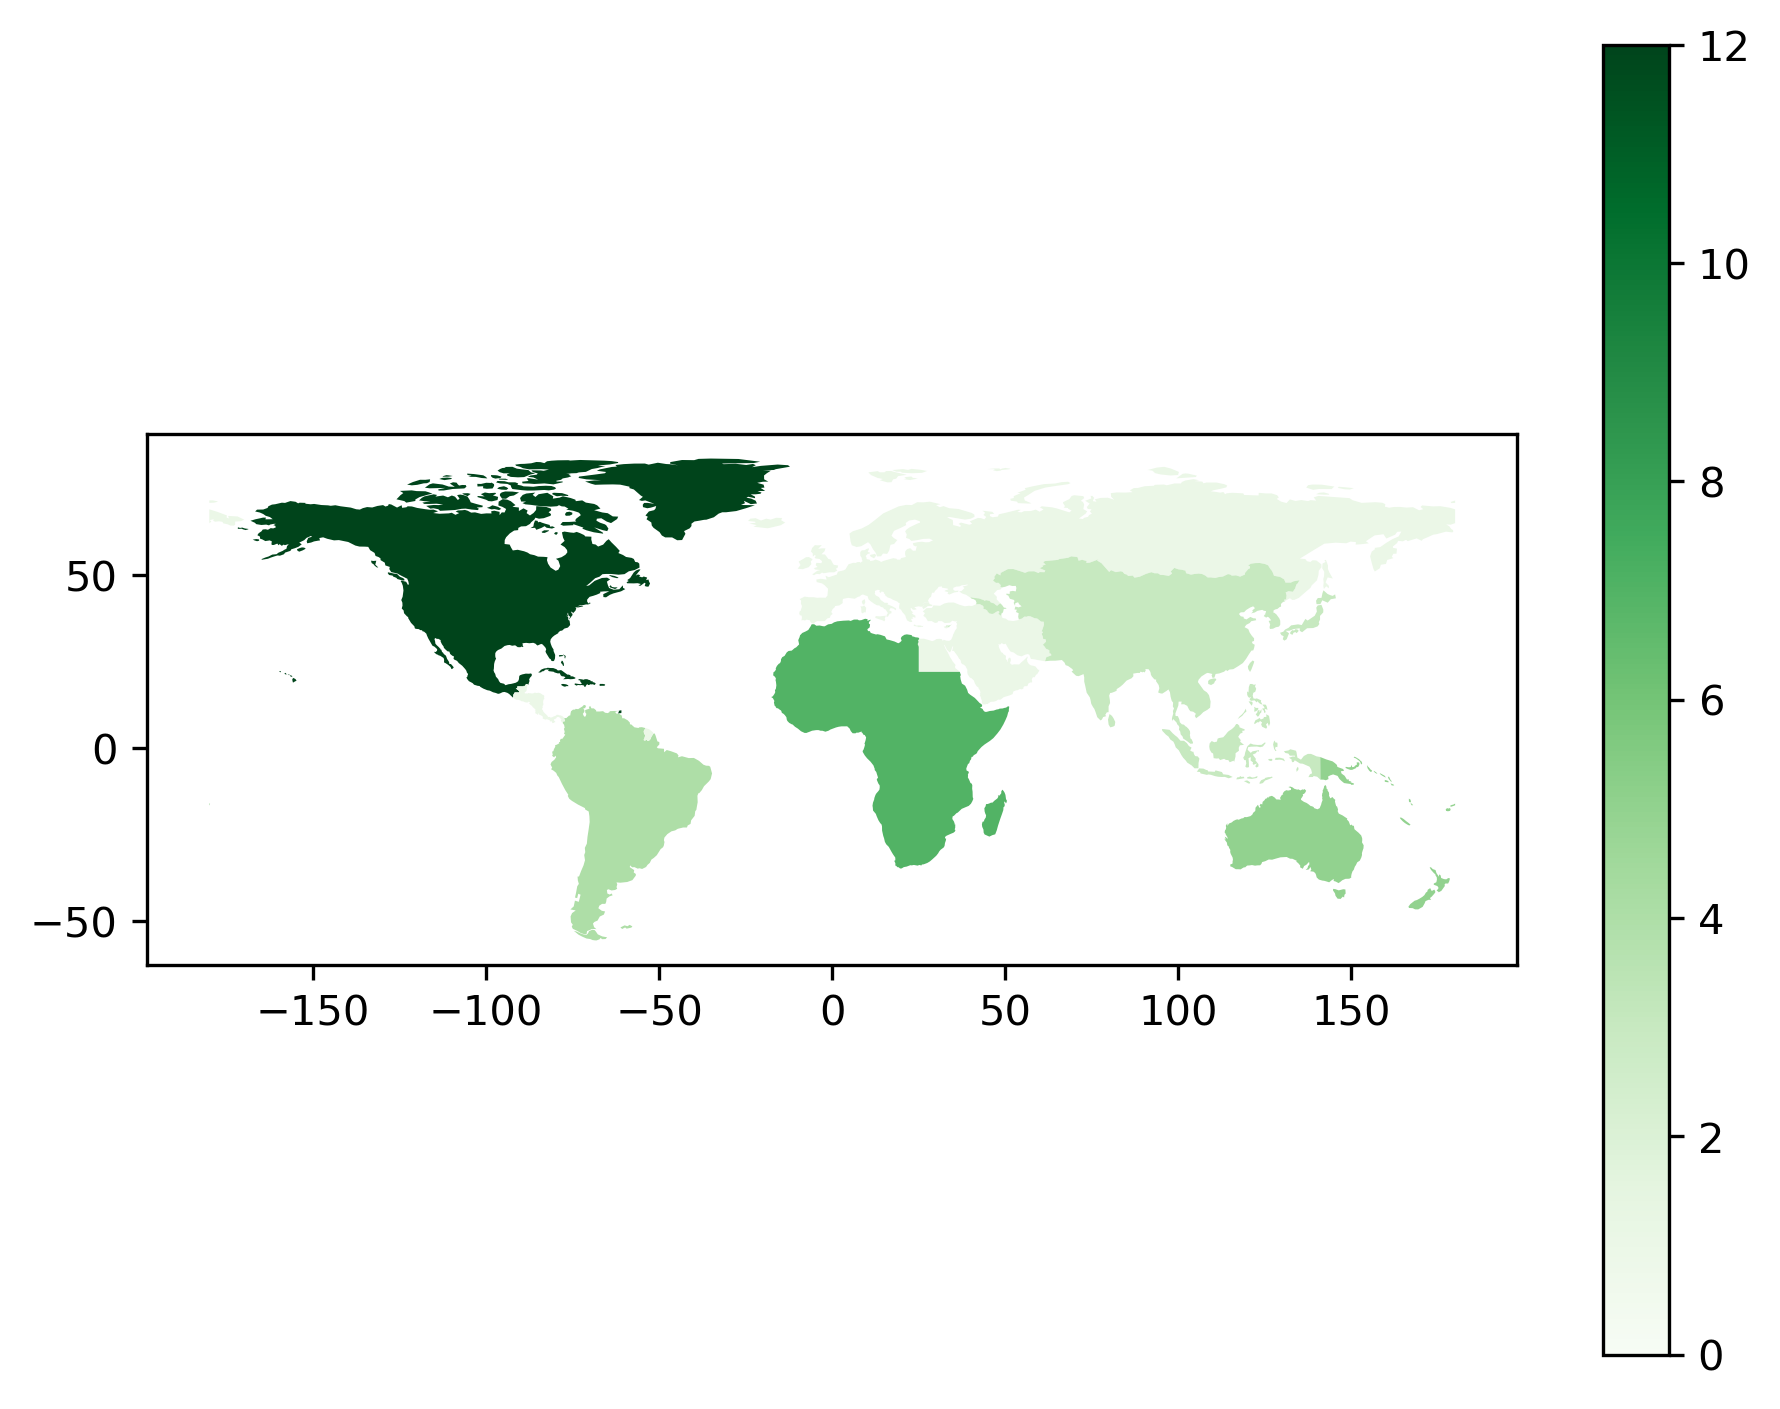

In [78]:
merged_regions.plot(
    column='Count', 
    legend=True,
    cmap='Greens',
    vmin=0,
)

plt.tight_layout()
plt.savefig(fig_dir + 'communities_map_region.png')
plt.show()

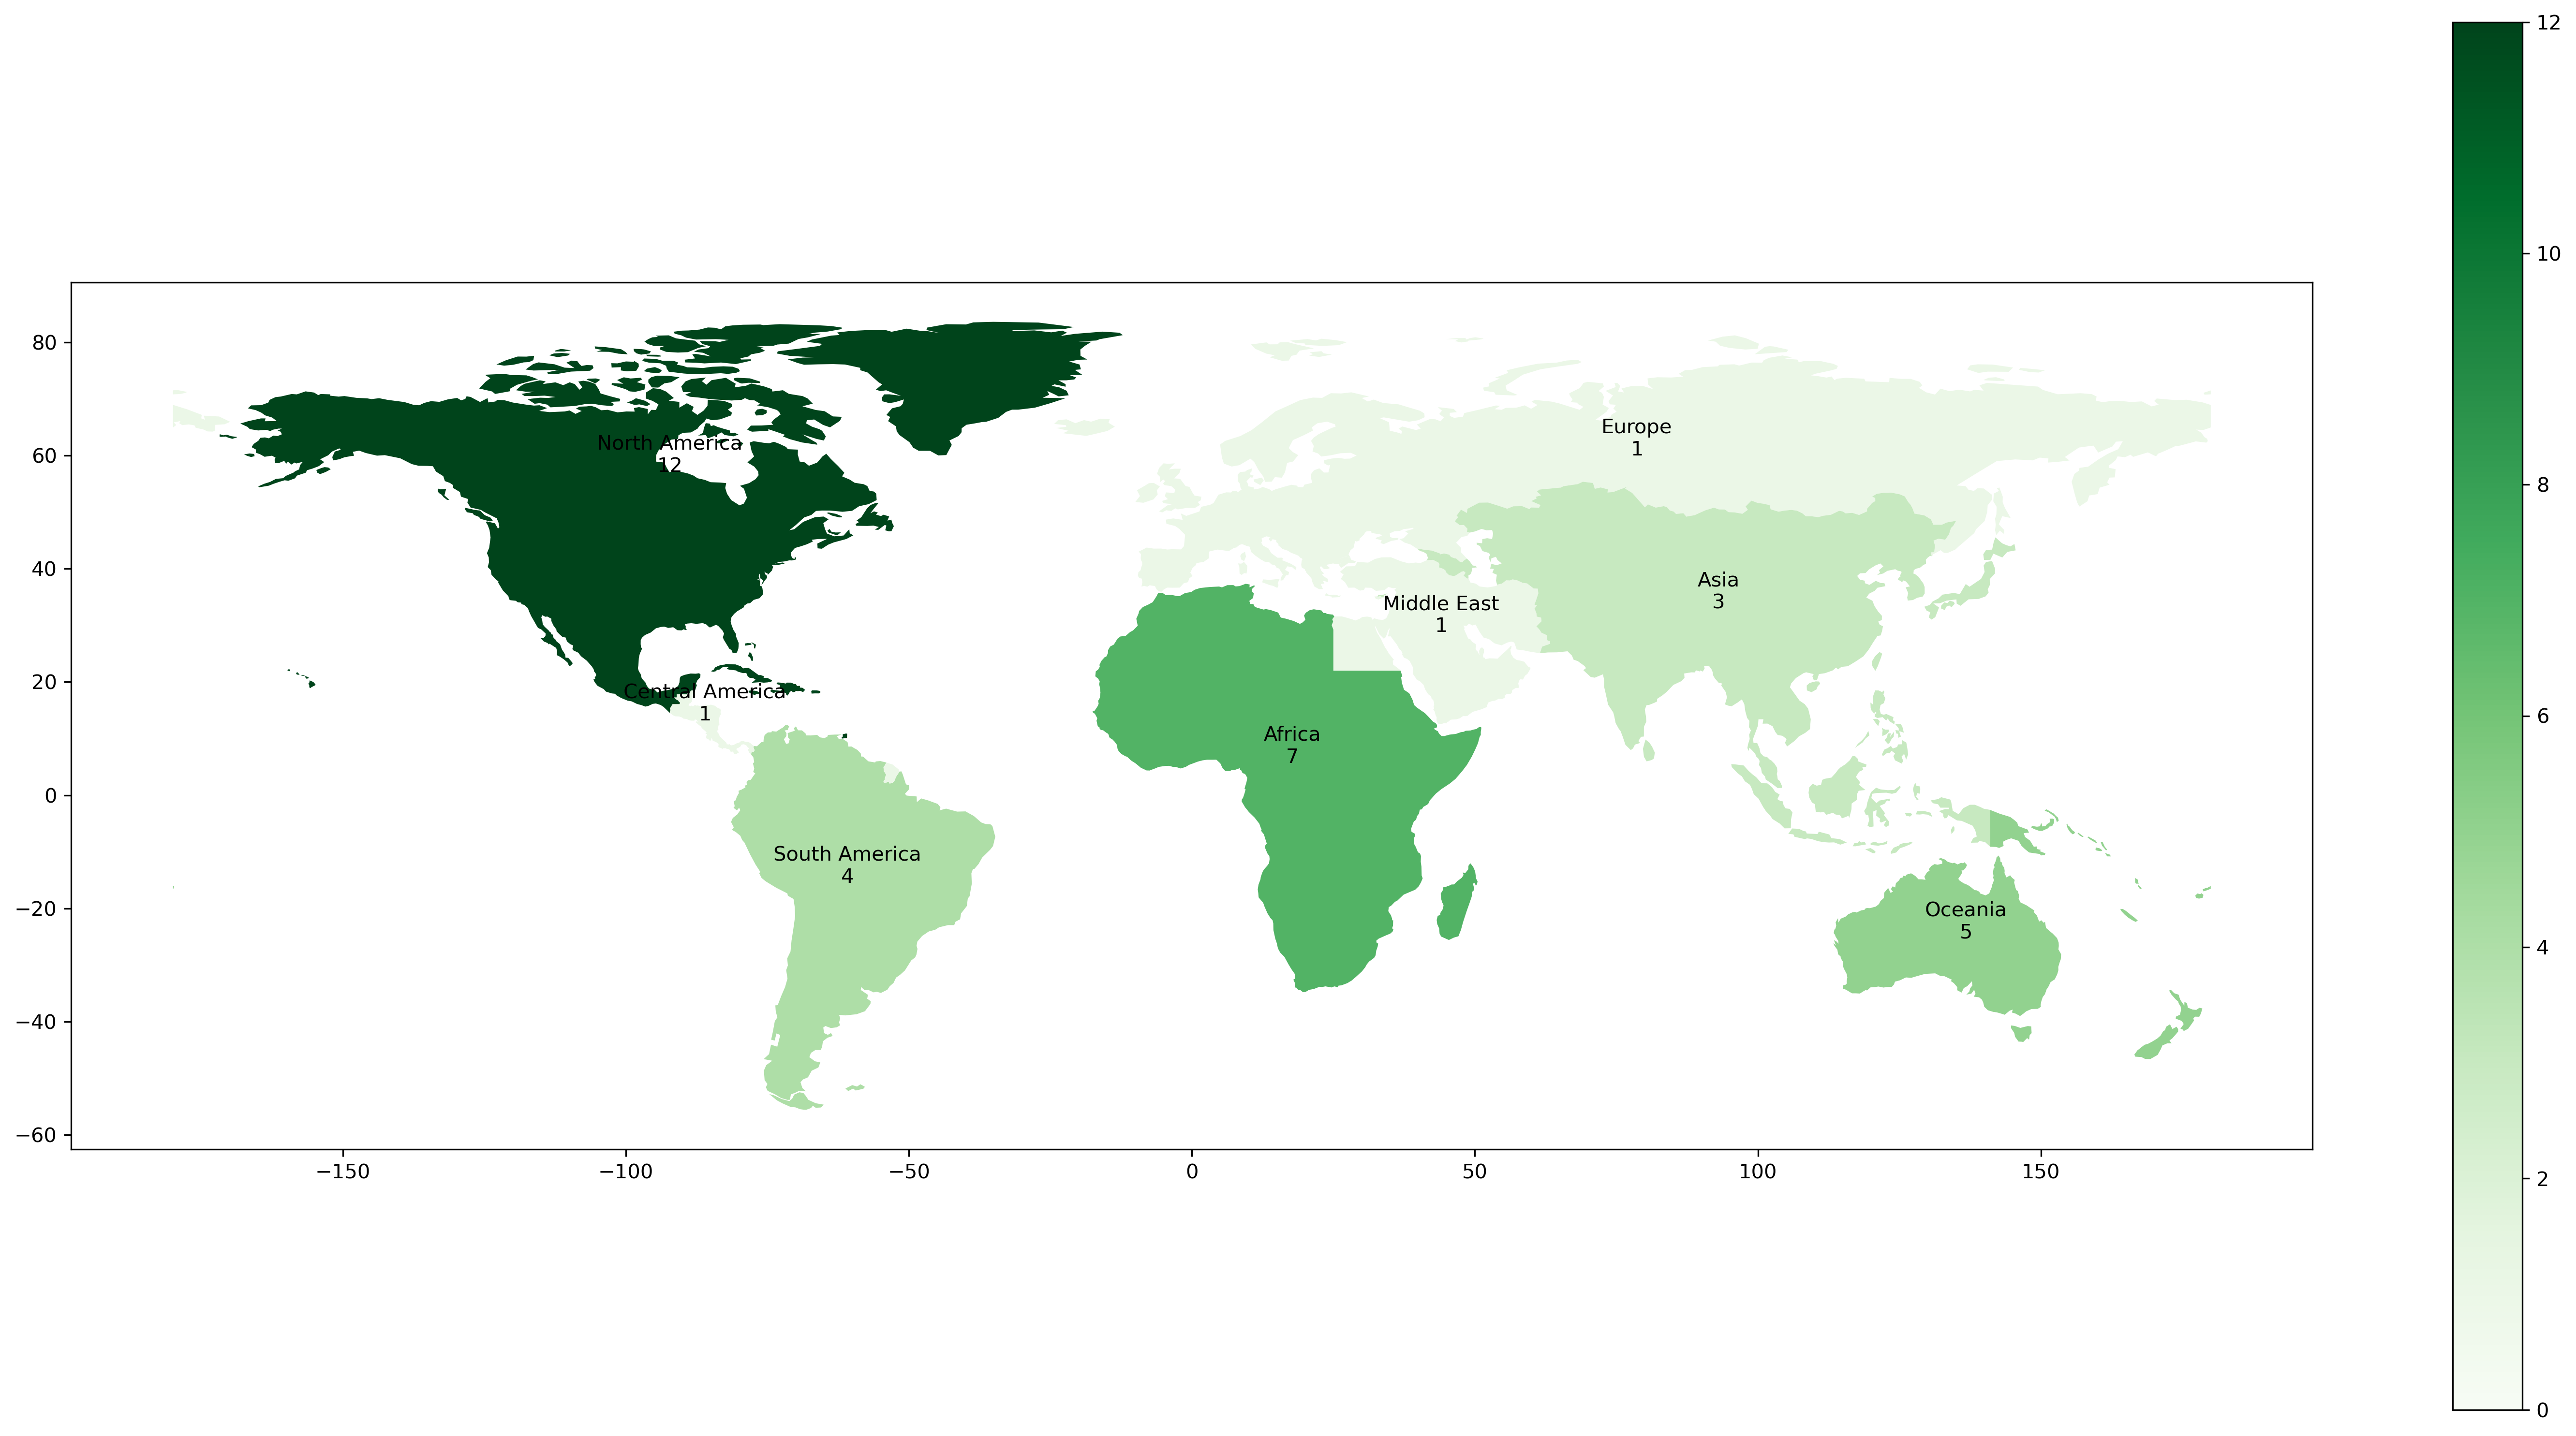

In [79]:
ax = merged_regions.plot(
    column='Count', 
    legend=True, 
    figsize=(20,10),
    cmap='Greens',
    vmin=0,
)

# Annotate
merged_regions.apply(lambda x: ax.annotate(text=x['Region'] + '\n' + str(x['Count']), xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

plt.tight_layout()
plt.savefig(fig_dir + 'communities_map_region_annotated.png')
plt.show()

## Time Span

Note:
- Change Time span to "Time span: Start" and "Time span: Stop"

In [80]:
gov_df['Time span: Start'].value_counts()

Time span: Start
 1800    9
 1700    8
 1500    5
 1600    3
 1900    2
 900     1
-900     1
-510     1
 1650    1
 1400    1
 1200    1
 1750    1
Name: count, dtype: int64

<Axes: xlabel='Time span: Start'>

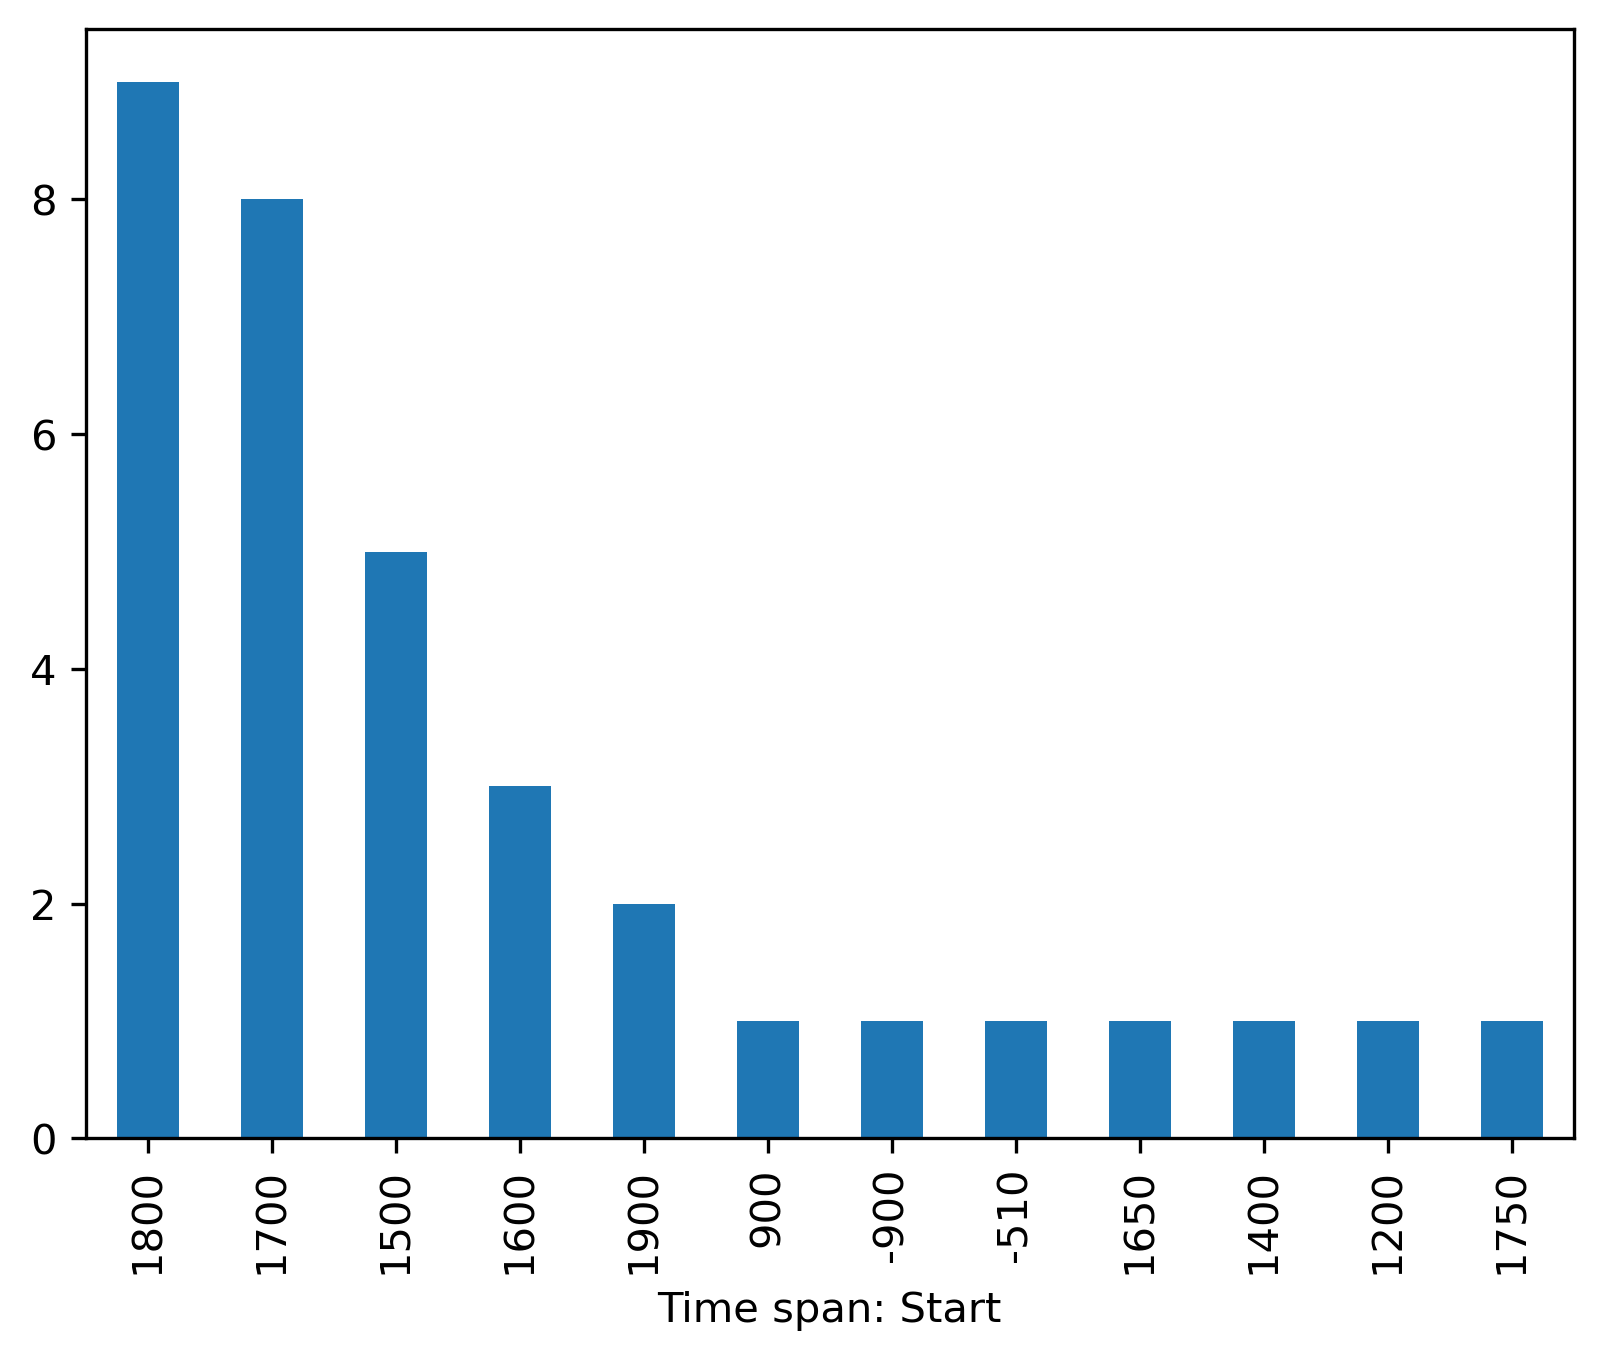

In [81]:
gov_df['Time span: Start'].value_counts().plot(kind='bar')

In [82]:
time_span_start_dates = gov_df['Time span: Start'].unique()

In [83]:
time_span_start_dates_order = sorted(time_span_start_dates)

In [84]:
time_span_start_dates_order

[np.int64(-900),
 np.int64(-510),
 np.int64(900),
 np.int64(1200),
 np.int64(1400),
 np.int64(1500),
 np.int64(1600),
 np.int64(1650),
 np.int64(1700),
 np.int64(1750),
 np.int64(1800),
 np.int64(1900)]

<Axes: xlabel='Time span: Start'>

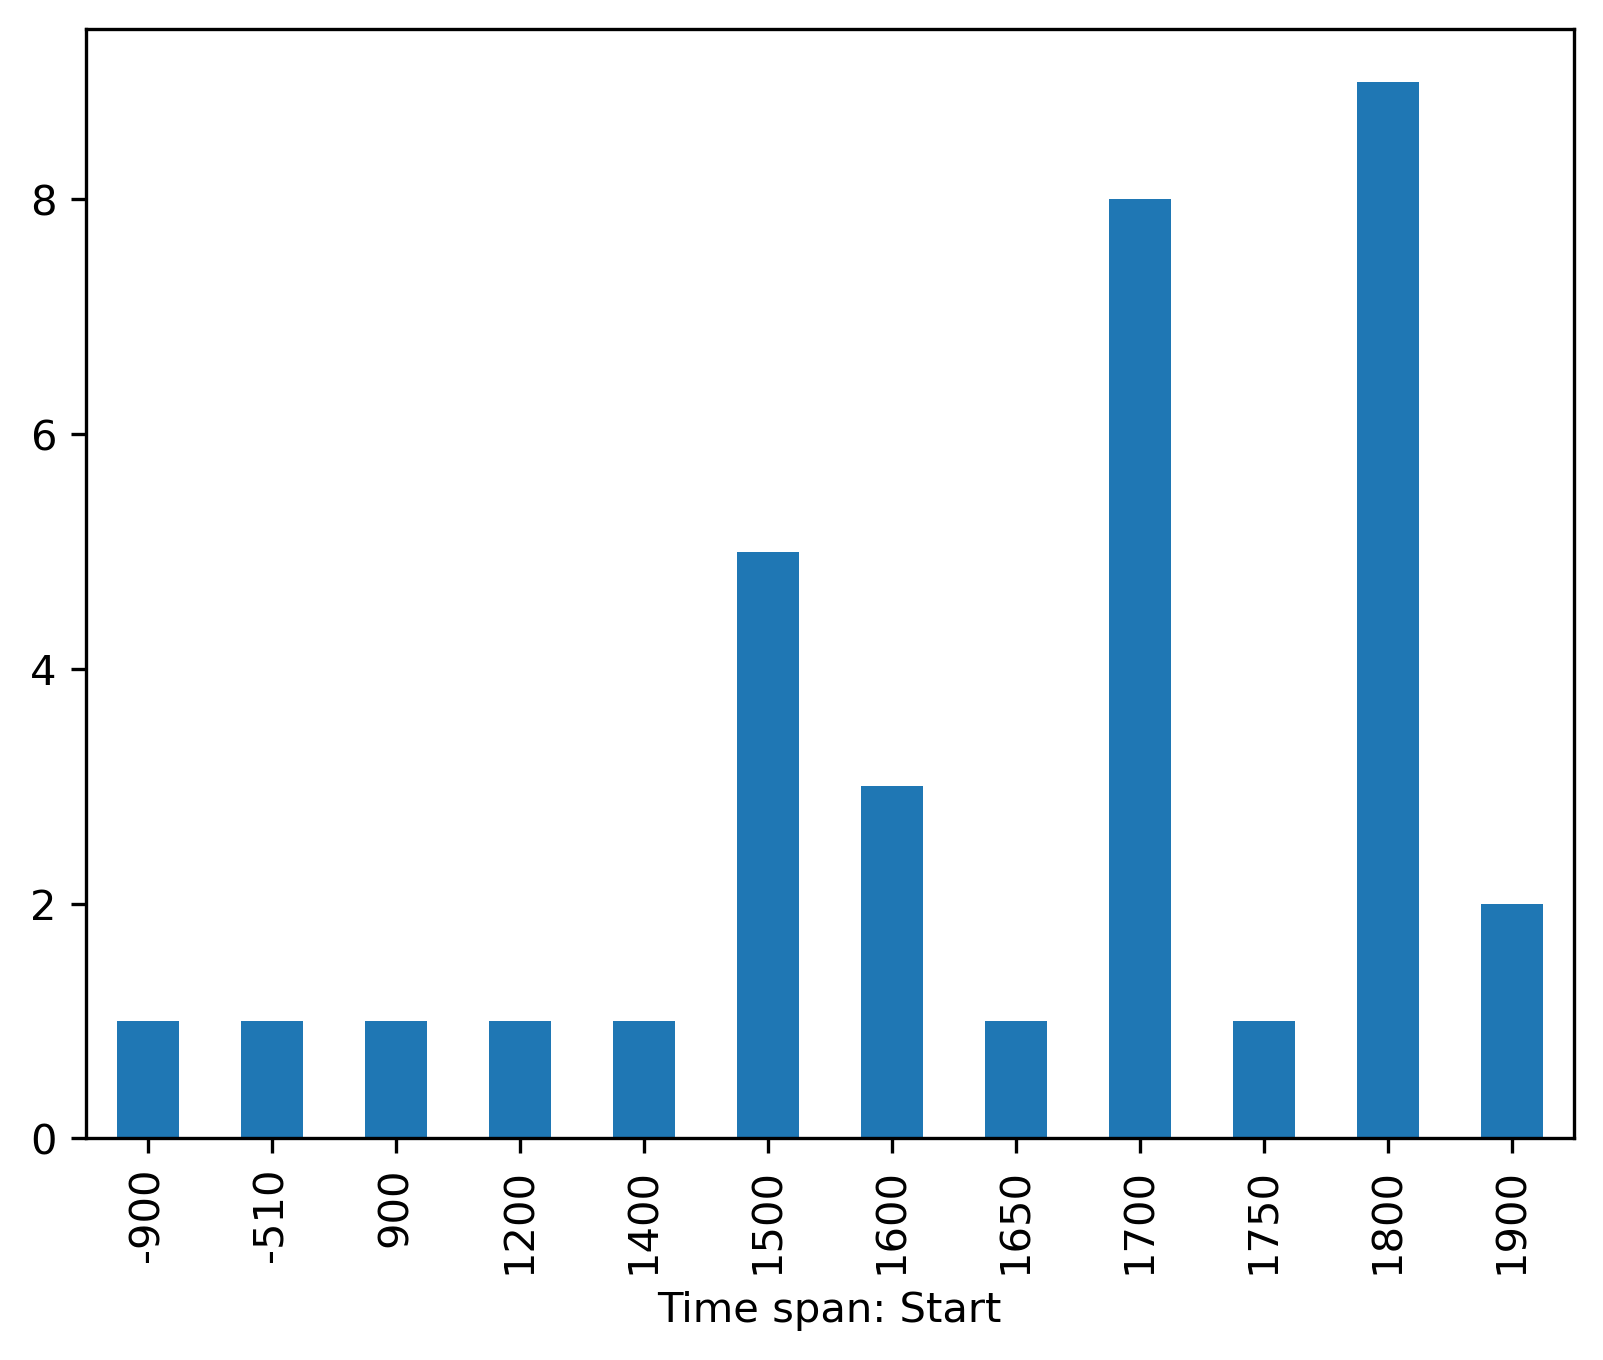

In [85]:
gov_df['Time span: Start'].value_counts().loc[time_span_start_dates_order].plot.bar()

In [86]:
gov_df['Time span: End'].value_counts()

Time span: End
 1900    14
 1800     4
 1850     4
 2000     3
 1600     2
 2023     1
-600      1
 1560     1
-27       1
 1950     1
 1700     1
 1880     1
Name: count, dtype: int64

<Axes: xlabel='Time span: End'>

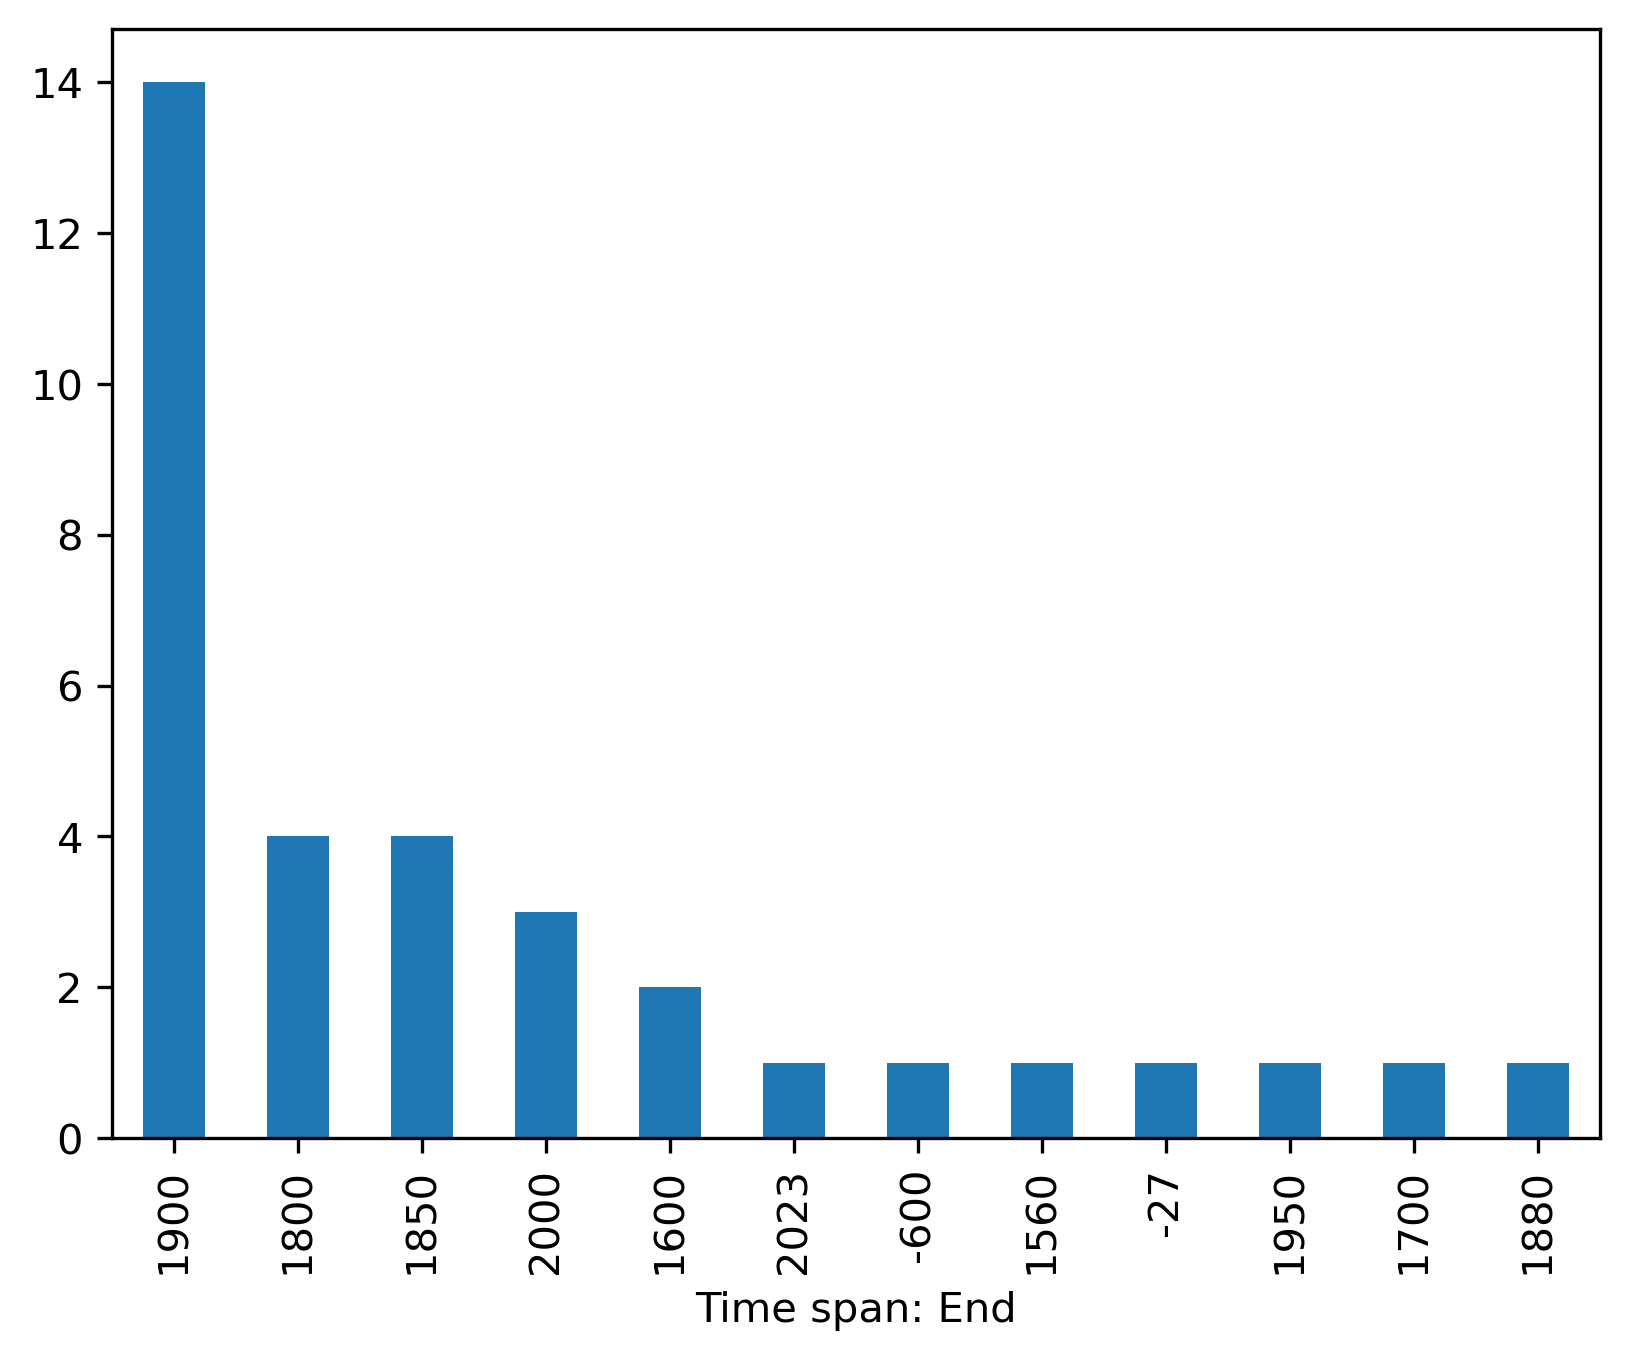

In [87]:
gov_df['Time span: End'].value_counts().plot(kind='bar')

<Axes: xlabel='Time span: End'>

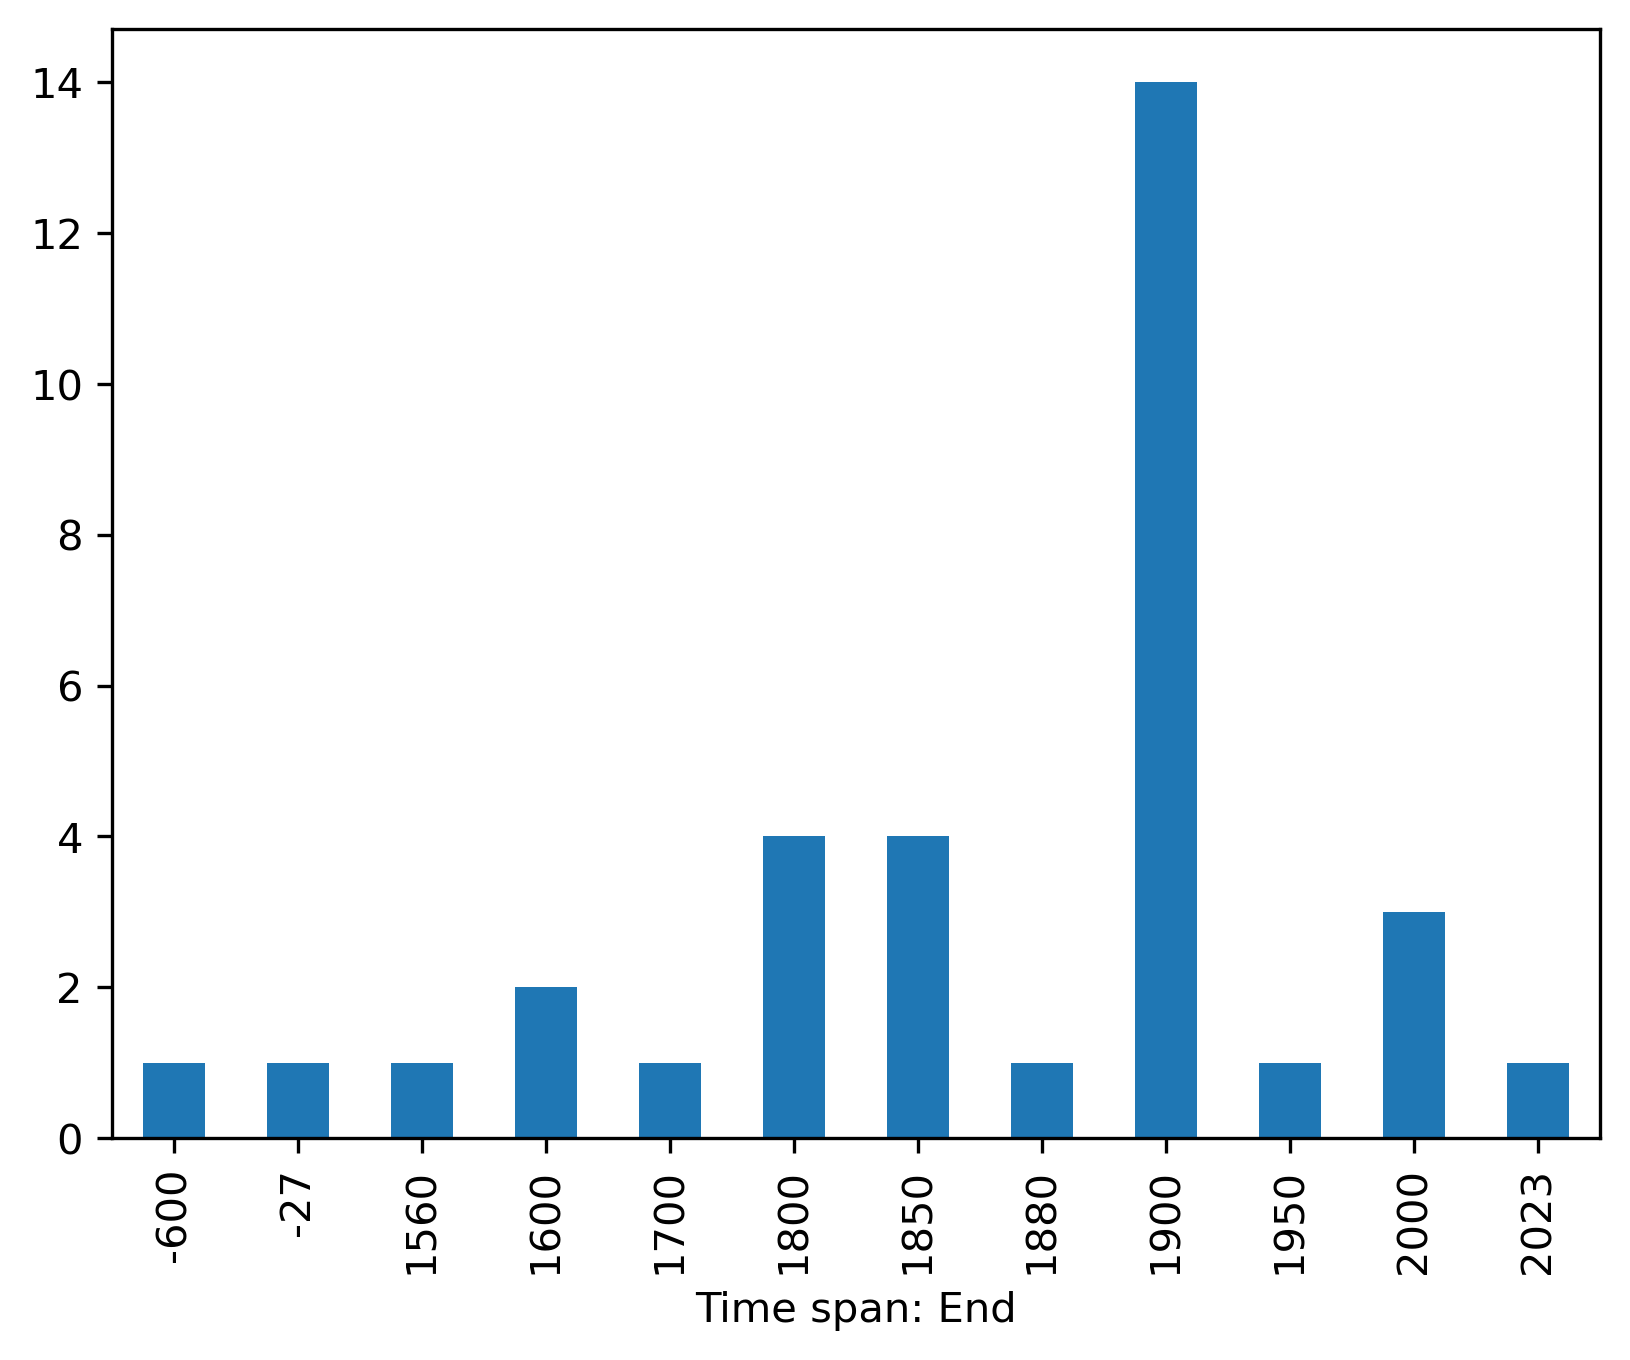

In [88]:
time_span_end_dates = gov_df['Time span: End'].unique()
time_span_end_dates_order = sorted(time_span_end_dates)

gov_df['Time span: End'].value_counts().loc[time_span_end_dates_order].plot.bar()

In [89]:
gov_df[['Time span: Start', 'Time span: End', 'Time span: Duration', 'Name']].head()

Time span: Start  Time span: End  Time span: Duration  \
7               -900            -600                  300   
27               900            1560                  660   
36              1900            2023                  123   
46              1900            2000                  100   
47              1700            1800                  100   

                    Name  
7              Babylonia  
27           Igbo People  
36  Kung San (Ju/hoansi)  
46            Nambikuara  
47        Natchez people

In [90]:
dates_df = gov_df[['Time span: Start', 'Time span: Duration', 'Name']]

In [91]:
dates_df.head()

Time span: Start  Time span: Duration                  Name
7               -900                  300             Babylonia
27               900                  660           Igbo People
36              1900                  123  Kung San (Ju/hoansi)
46              1900                  100            Nambikuara
47              1700                  100        Natchez people

In [92]:
dates_tuples = [tuple(x) for x in dates_df.to_numpy()]

In [93]:
dates_tuples

[(-900, 300, 'Babylonia'),
 (900, 660, 'Igbo People'),
 (1900, 123, 'Kung San (Ju/hoansi)'),
 (1900, 100, 'Nambikuara'),
 (1700, 100, 'Natchez people'),
 (1700, 200, 'Pomo'),
 (-510, 483, 'Rome (republic)'),
 (1500, 100, 'Wendat (Huron)'),
 (1700, 200, 'Tehuelche'),
 (1500, 100, 'Tupinamba'),
 (1650, 350, 'Yanomamo'),
 (1700, 150, 'Ajie'),
 (1700, 200, 'Maori'),
 (1800, 100, 'Marquesans'),
 (1800, 100, 'Samoans '),
 (1400, 500, 'Gilbertese'),
 (1800, 100, 'Toda'),
 (1600, 350, 'Nicobarese'),
 (1600, 200, 'Gilyak (Nivkh)'),
 (1800, 100, 'Nama'),
 (1500, 300, 'Thonga (Tsonga)'),
 (1600, 200, 'Ashanti'),
 (1500, 200, 'Masai'),
 (1200, 650, 'Somali'),
 (1800, 100, "Ingalik [Deg Xit'an]"),
 (1700, 200, 'Kutenai'),
 (1500, 500, "Micmac [Mi'kmaq]"),
 (1700, 150, 'Hidatsa'),
 (1750, 100, 'Pawnee'),
 (1800, 100, 'Chiricahua'),
 (1700, 180, 'Omaha'),
 (1800, 100, 'Twana'),
 (1800, 100, 'Comanche'),
 (1800, 100, 'Huichol')]

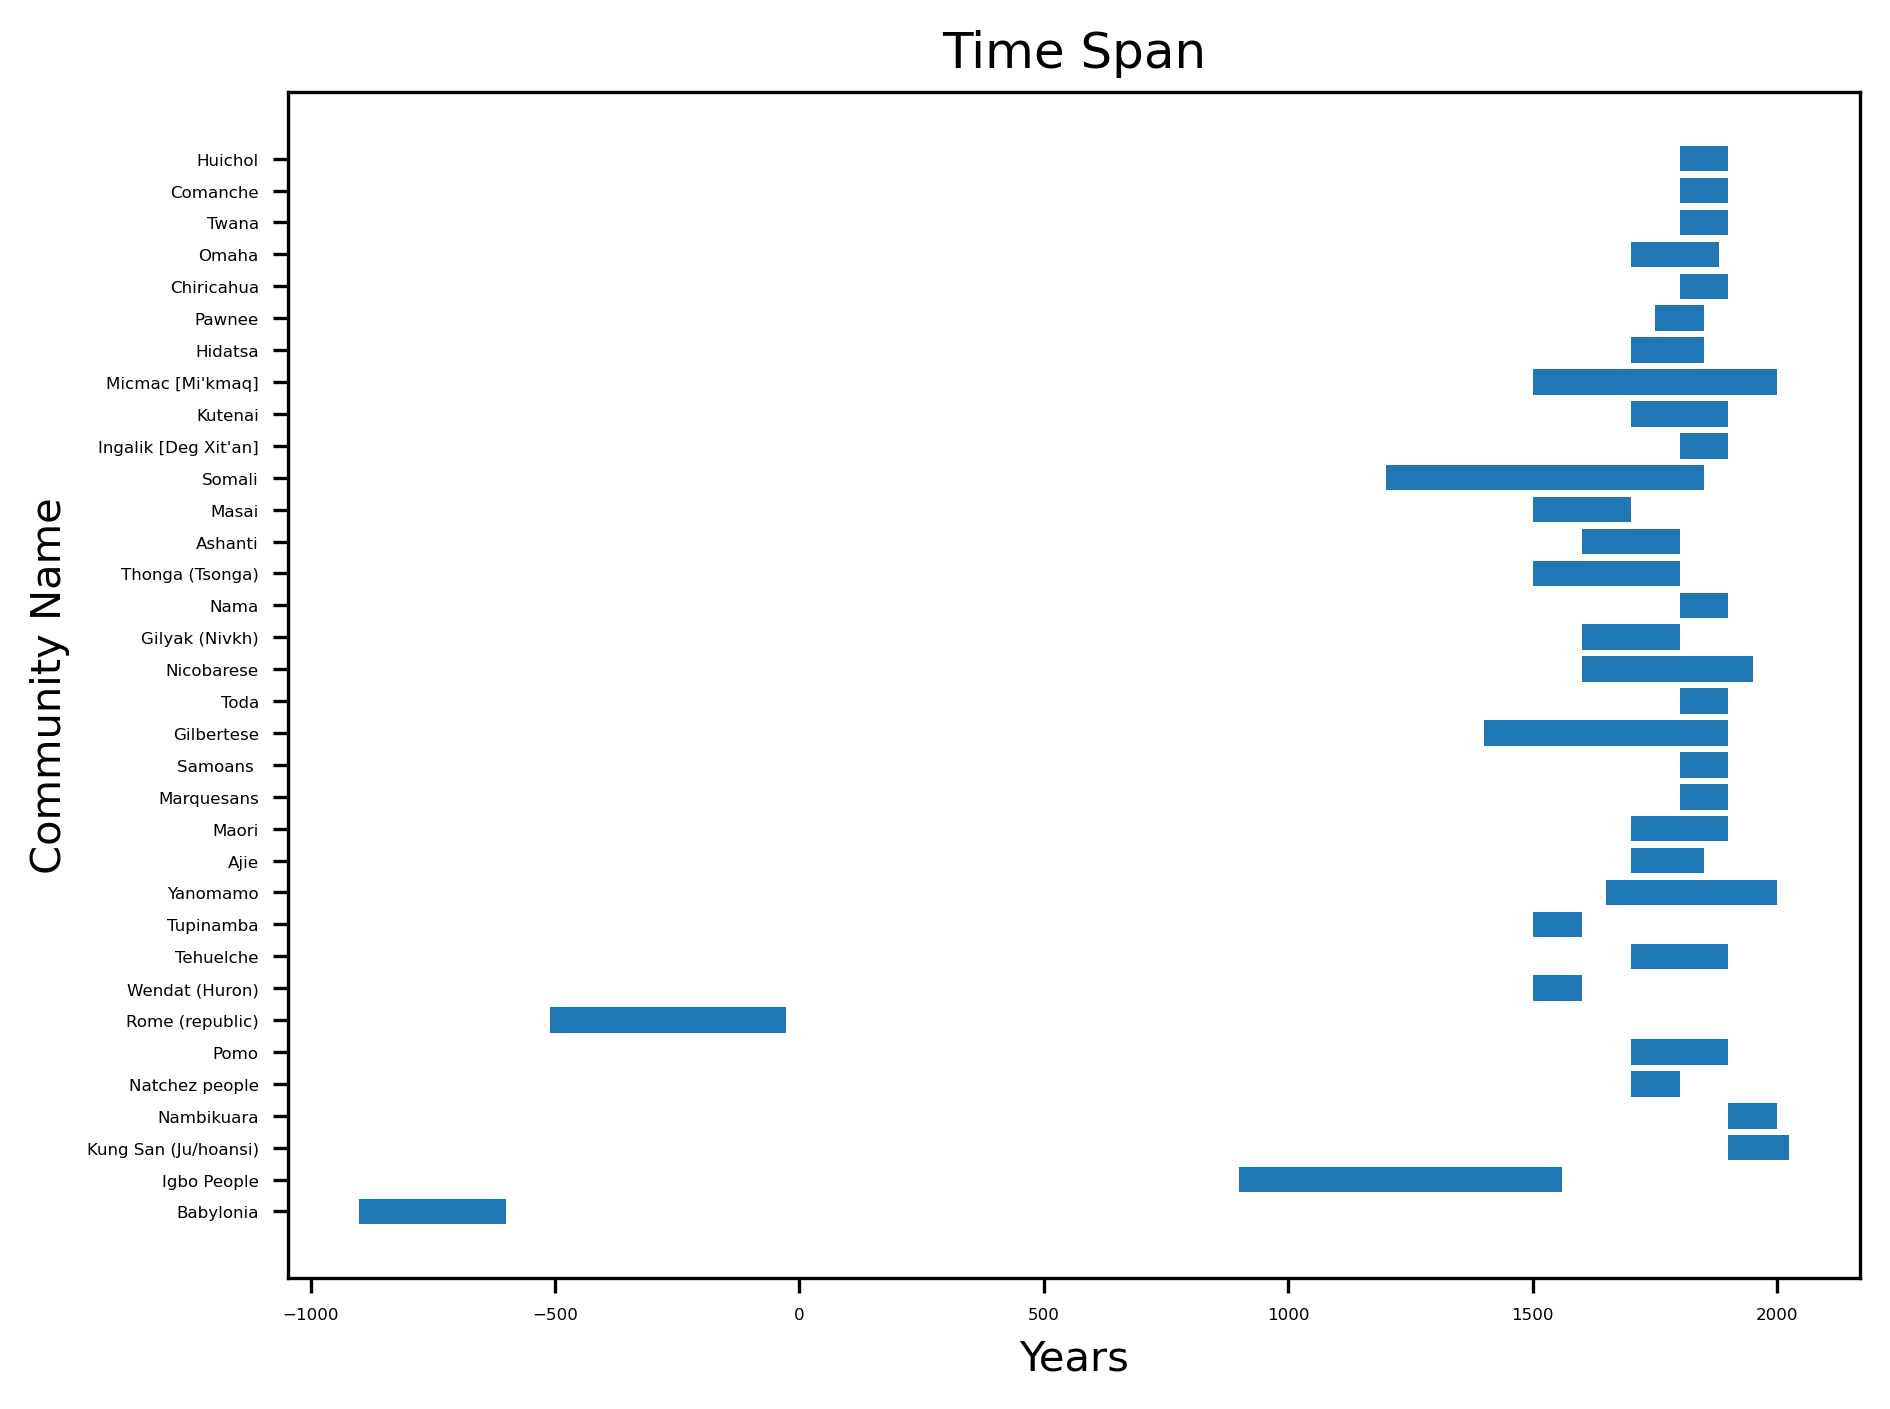

In [94]:
# create figure and plot
fig, ax = plt.subplots()
labels = []
for i, (start, duration, label) in enumerate(dates_tuples):
    labels.append(label)
    ax.broken_barh([(start, duration)], (i-0.4,0.8))

# set yticks at the middle of the bars
ax.set_yticks(range(len(dates_tuples)))
ax.set_yticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=4)

ax.set_xlabel('Years')
ax.set_ylabel('Community Name')

plt.title('Time Span')
# plt.grid(True)
# plt.figure(figsize=(80, 80))

plt.tight_layout()
plt.savefig(fig_dir + 'communities_timeline.png')
plt.show()

/ Notes / TODO:
- x Mechanisms, Institution, Culture/Norms etc. 
- x Plot time span 
- Cluster communities by similarity (PCA) - can check w Seth
- CGI-specific analyses 

/
- Address remaining questions in doc: https://docs.google.com/document/d/1f1Qa25OGWWrvK5xrZjuLeqYn4WkgnyUH/edit
- CGIs: 
  - what do CGIs look like? 
  - How are they connected with other institutions? 
  - How many cgis per community, on average? 
  - how many non cgis, on average? How many institutions per community, on average? 
  - Does the variation interact with size, time or space?
  - Identify patterns in terms of:
      - Functions of the CGI
      - Level of jurisdiction (local/central) and membership (elite/commoners)
      - Within a type of CGI (say, assembly), what are the main sources of variation in terms of function and membership?
      - Possible interactions with size
  
- Mechanisms:
  - How many mechanisms in CGIs, on average? 
  - how many mechanisms in the community? 
  - What mechanisms prevail? 
  - What mechanisms prevail in CGIs compared to non-CGIs?
  - Does the variation interact with size, time or space?
  
- Region:
  - can we identify any regional characteristics? 
  - We should also provide a simple breakdown of each of the three features (time, place, size). 
  - How many communities in each?

/
- CGI network structures?

### TODO 

1. Finish descriptive analysis 
- x CGI analysis -- histogram for mechanisms
- x Timeline plotting 
- x Geography mapping
- x Clean up + reformat size


2. Mechanisms analysis 
- Mechanisms x geography, mechanisms x time, mechanisms x size


3. CGI Analysis 
- CGI-mechanism histogram 
- CGI Mechanisms x geography, mechanisms x time, mechanisms x size
- Correlation matrices for mechanisms and CGI mechanisms


4. Similarity clustering 
- Similarity clustering for Communities 

# Pairplots

In [95]:
# data_df = gov_df.select_dtypes(include=[np.number]).dropna()

In [96]:
# sns.pairplot(data_df)

## TODO: Clustering communities by similarity